# **Ecommerce Customer Churn Analysis and Prediction**

# **Definisi Masalah dan Pemahaman Data**

---

## **Definisi Masalah**

**Stakeholder**:  
Stakeholder utama adalah tim manajemen dan divisi retensi pelanggan dari perusahaan e-commerce terkemuka. Para stakeholder bertujuan untuk mengurangi tingkat churn pelanggan dan meningkatkan loyalitas pelanggan melalui strategi promosi yang terarah.

**Pernyataan Masalah**:  
Churn pelanggan dapat menyebabkan kerugian pendapatan yang signifikan serta peningkatan biaya untuk mendapatkan pelanggan baru. Tujuannya adalah mengidentifikasi pelanggan yang berisiko churn menggunakan model prediksi berbasis data. Dengan cara ini, perusahaan dapat mengalokasikan sumber daya secara efisien dan memberikan penawaran promosi yang dipersonalisasi untuk mempertahankan pelanggan yang berisiko tinggi.

- **Spesifik**: Mengidentifikasi pelanggan dengan kemungkinan tinggi untuk churn.
- **Terukur**: Memprediksi churn dengan tingkat precision dan recall yang tinggi, memaksimalkan F1-Score.
- **Dapat Dicapai**: Menggunakan data historis pelanggan, termasuk pola perilaku dan transaksi, untuk melatih model prediksi.

**Pentingnya Masalah**:  
Mencegah churn lebih hemat biaya dibandingkan dengan mendapatkan pelanggan baru. Prediksi churn yang dilakukan lebih awal memungkinkan perusahaan untuk secara proaktif berinteraksi dengan pelanggan yang berisiko, meningkatkan kepuasan pelanggan, dan profitabilitas jangka panjang.

**Target**:  
Mengembangkan model untuk mengklasifikasikan pelanggan menjadi dua kelompok:
- **0**: Pelanggan tidak berisiko churn.
- **1**: Pelanggan berisiko churn.

**Tujuan**:
1. Memprediksi kemungkinan churn untuk setiap pelanggan.
2. Mengidentifikasi faktor utama yang menyebabkan churn pelanggan untuk memberikan wawasan yang dapat ditindaklanjuti.

---

## **Pemahaman Data**

### **Ikhtisar Data**  
Dataset ini berisi informasi tingkat pelanggan, termasuk demografi, riwayat transaksi, metrik perilaku, dan indikator kepuasan. Setiap baris merepresentasikan satu pelanggan, sedangkan setiap kolom menangkap fitur spesifik dari profil mereka.

### **Variabel Utama**:
- **CustomerID**: Identitas unik untuk setiap pelanggan.
- **Churn**: Indikator biner (1 untuk yang churn, 0 untuk tidak churn).
- **Tenure**: Durasi waktu pelanggan telah bersama perusahaan.
- **PreferredLoginDevice**: Jenis perangkat yang digunakan untuk login ke platform.
- **CityTier**: Kategori kota tempat tinggal pelanggan.
- **WarehouseToHome**: Jarak dari gudang ke rumah pelanggan.
- **PreferredPaymentMode**: Metode pembayaran yang disukai pelanggan.
- **Gender**: Jenis kelamin pelanggan.
- **HourSpendOnApp**: Rata-rata waktu yang dihabiskan di aplikasi e-commerce per hari.
- **NumberOfDeviceRegistered**: Jumlah perangkat yang terdaftar di akun pelanggan.
- **PreferedOrderCat**: Kategori produk yang sering dibeli.
- **SatisfactionScore**: Skor kepuasan pelanggan pada skala tertentu.
- **MaritalStatus**: Status pernikahan pelanggan.
- **NumberOfAddress**: Jumlah alamat yang terkait dengan akun.
- **Complain**: Apakah pelanggan pernah mengajukan keluhan.
- **OrderAmountHikeFromlastYear**: Peningkatan nilai pesanan dari tahun sebelumnya.
- **CouponUsed**: Jumlah kupon yang digunakan oleh pelanggan.
- **OrderCount**: Jumlah total pesanan yang dilakukan pelanggan.
- **DaySinceLastOrder**: Hari sejak pesanan terakhir pelanggan.
- **CashbackAmount**: Cashback yang diterima pelanggan.

### **Sumber**:
Dataset ini disediakan oleh perusahaan e-commerce.

### **Observasi Penting**:
1. Dataset mencakup informasi perilaku dan demografis, yang penting untuk memahami churn.
2. Beberapa fitur memiliki nilai yang hilang (contoh: **Tenure**, **HourSpendOnApp**) yang memerlukan imputasi.
3. Data ini cocok untuk teknik pembelajaran terawasi (supervised learning), mengingat adanya variabel target yang jelas (**Churn**).

---

## **Evaluasi Metrik**

### **Jenis Kesalahan dan Dampaknya**

1. **Type 1 Error (False Positive)**:  
   - **Penjelasan**: Model memprediksi bahwa seorang pelanggan akan churn (risiko tinggi), padahal sebenarnya pelanggan tersebut tidak akan churn.  
   - **Dampak**:
     - Pemborosan sumber daya: Anggaran dan upaya digunakan untuk pelanggan yang sebenarnya tidak membutuhkan perhatian.
     - Efek jangka panjang: Bisa menciptakan ketergantungan pelanggan terhadap insentif atau memengaruhi persepsi pelanggan tentang layanan.

2. **Type 2 Error (False Negative)**:  
   - **Penjelasan**: Model memprediksi bahwa seorang pelanggan tidak akan churn (risiko rendah), padahal sebenarnya pelanggan tersebut churn.  
   - **Dampak**:
     - Kehilangan pendapatan: Pelanggan yang churn berarti hilangnya potensi pendapatan jangka panjang.
     - Biaya akuisisi baru: Mengganti pelanggan yang hilang memerlukan biaya lebih tinggi dibandingkan mempertahankan pelanggan lama.

3. **True Positive (TP)**:  
   - **Penjelasan**: Model memprediksi dengan benar bahwa pelanggan akan churn.  
   - **Dampak**:
     - Retensi pelanggan: Perusahaan berhasil mempertahankan pelanggan yang benar-benar rentan churn.
     - Efisiensi biaya: Sumber daya digunakan secara optimal pada pelanggan yang memang berisiko tinggi.

4. **True Negative (TN)**:  
   - **Penjelasan**: Model memprediksi dengan benar bahwa pelanggan tidak akan churn.  
   - **Dampak**:
     - Penghematan biaya: Tidak ada insentif atau program retensi yang diberikan untuk pelanggan yang tidak memerlukannya.
     - Efisiensi fokus: Perusahaan dapat mengalokasikan sumber daya untuk pelanggan yang lebih membutuhkan perhatian.

### **F1-Score**  
**Keunggulan F1-Score**:
- **Keseimbangan Precision dan Recall**: Sebagai harmonic mean dari precision dan recall, F1-Score cocok untuk memastikan model tidak hanya fokus pada meminimalkan false positives (precision) atau false negatives (recall).
- **Efektif untuk Data Tidak Seimbang**: Dalam kasus churn, data sering kali tidak seimbang (lebih banyak pelanggan tidak churn dibanding churn). F1-Score memberikan gambaran yang lebih realistis dibandingkan akurasi.
- **Relevan untuk Tujuan Bisnis**: Memastikan pelanggan yang benar-benar berisiko churn terdeteksi dengan baik tanpa terlalu banyak kesalahan positif.

**Kelemahan F1-Score**:
- **Tidak Mengutamakan Konsekuensi Bisnis**: Memberikan bobot yang sama untuk precision dan recall. Jika salah satu lebih kritis untuk bisnis (misalnya, lebih baik salah mengidentifikasi pelanggan churn daripada kehilangan pelanggan), F1 mungkin kurang optimal.
aik salah mengidentifikasi pelanggan churn daripada kehilangan pelanggan), F1 mungkin kurang optimal.


Data Source : https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction


**Data Dictionary**

Dataset yang digunakan adalah data ecommerce customer churn sebanyak 5630 baris data dan sebanyak 20 kolom atau fitur. Kolom ini mewakili informasi dari pelanggan yang terdaftar. Kolom-kolom yang terdapat dalam dataset antara lain: 

| Variable |Data Type| 	Description| 
|----------|-------|---------
| CustomerID |Integer	|Unique customer ID
|Churn |Integer	|Churn Flag
|Tenure|Float	|Tenure of customer in organization
|PreferredLoginDevice|Object	|Preferred login device of customer
|CityTier|Integer	|City tier
|WarehouseToHome|Float	|Distance in between warehouse to home of customer
|PreferredPaymentMode|	Object|Preferred payment method of customer
|Gender|Object	|Gender of customer
|HourSpendOnApp|Float	|Number of hours spend on mobile application or website
|NumberOfDeviceRegistered|Integer|Total number of deceives is registered on particular customer
|PreferedOrderCat|Object	|Preferred order category of customer in last month
|SatisfactionScore|Integer	|Satisfactory score of customer on service
|MaritalStatus|Object	|Marital status of customer
|NumberOfAddress|Integer	|Total number of added added on particular customer
|Complain|	Integer|Any complaint has been raised in last month
|OrderAmountHikeFromlastYear|Float	|Percentage increases in order from last year
|CouponUsed|Float	|Total number of coupon has been used in last month
|OrderCount	| Float|Total number of orders has been places in last month
|DaySinceLastOrder|Float	|Day Since last order by customer
|CashbackAmount|Float	|Average cashback in last month





In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.impute import KNNImputer, SimpleImputer

In [2]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
df.shape

(5630, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### **Exploratory Data Analysis**

**Data Distribution**

In [5]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


Untuk melihat distribusi data dari kolom numerik, dapat digunakan boxplot. Untuk mempermudah analisis, kolom dibagi menjadi kolom numerikal dan kolom kategorikal. Walaupun Churn, CityTier, dan Complain bertipe data integer, ketiga kolom ini akan ini akan masuk ke dalam klasifikasi kategorikal karena kolom tersebut mewakili kategori atau flagging.  

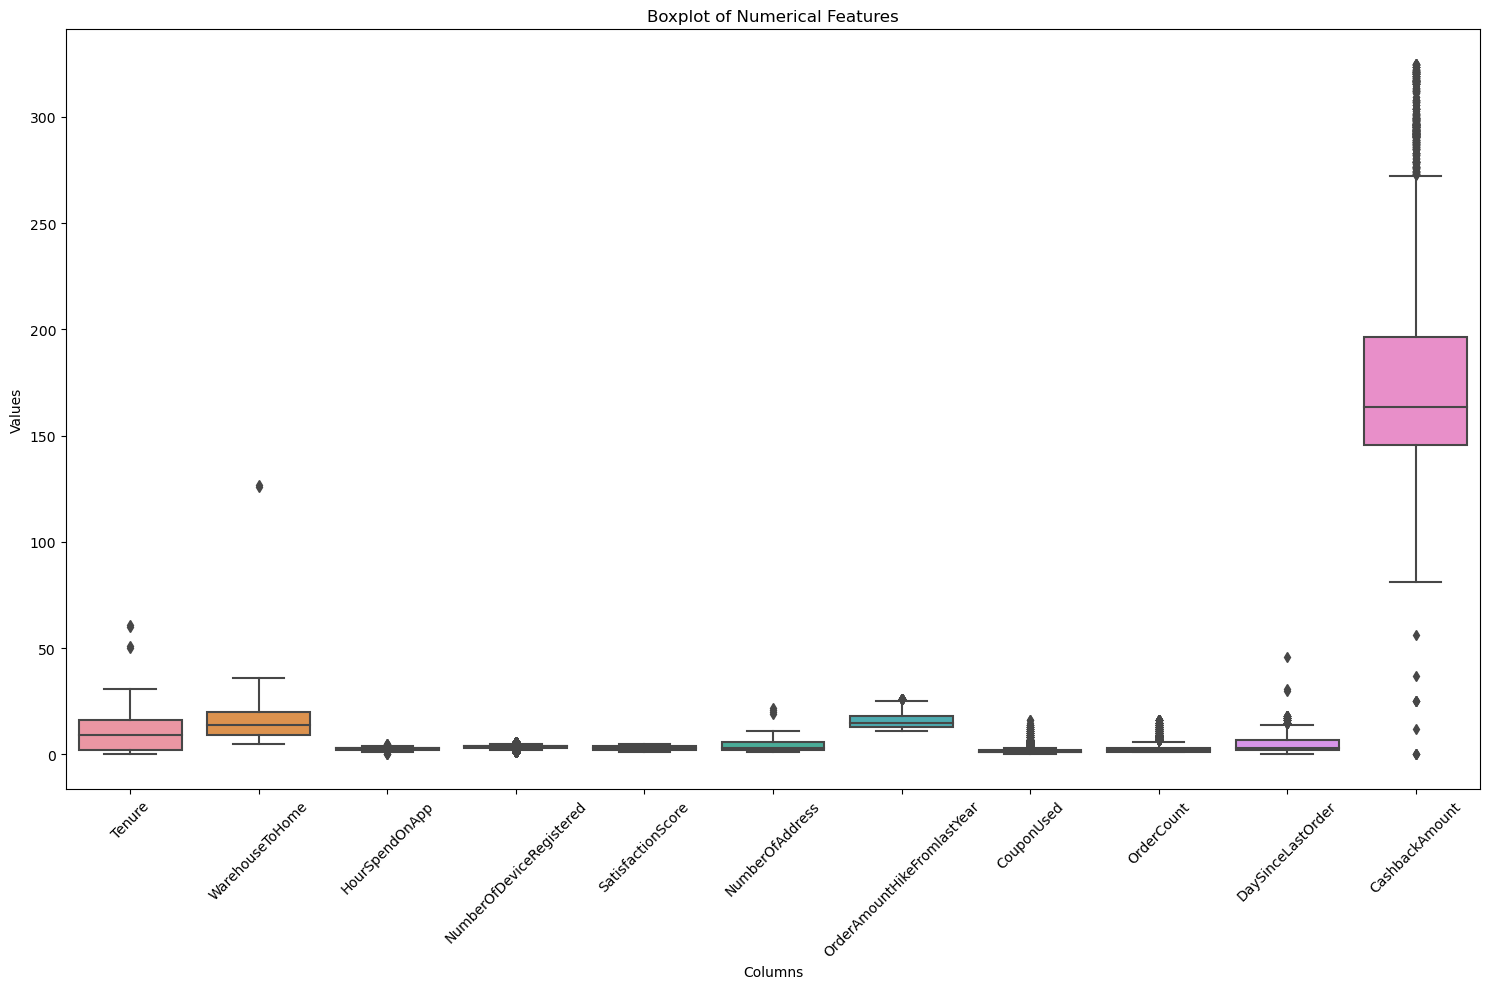

In [6]:
num_columns = [
    'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
    'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 
    'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'
]

plt.figure(figsize=(15, 10))  
sns.boxplot(data=df[num_columns])
plt.title('Boxplot of Numerical Features')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

Berdasarkan boxplot di atas, dapat dilihat bahwa hampir seluruh kolom numerik, kecuali SatisfactionScore, memiliki nilai outliers. Hal ini dapat dilihat dari adanya titik-titik yang berada di luar whiskers dan ini menunjukkan adanya nilai ekstrem yang perlu dilihat lebih lanjut. 

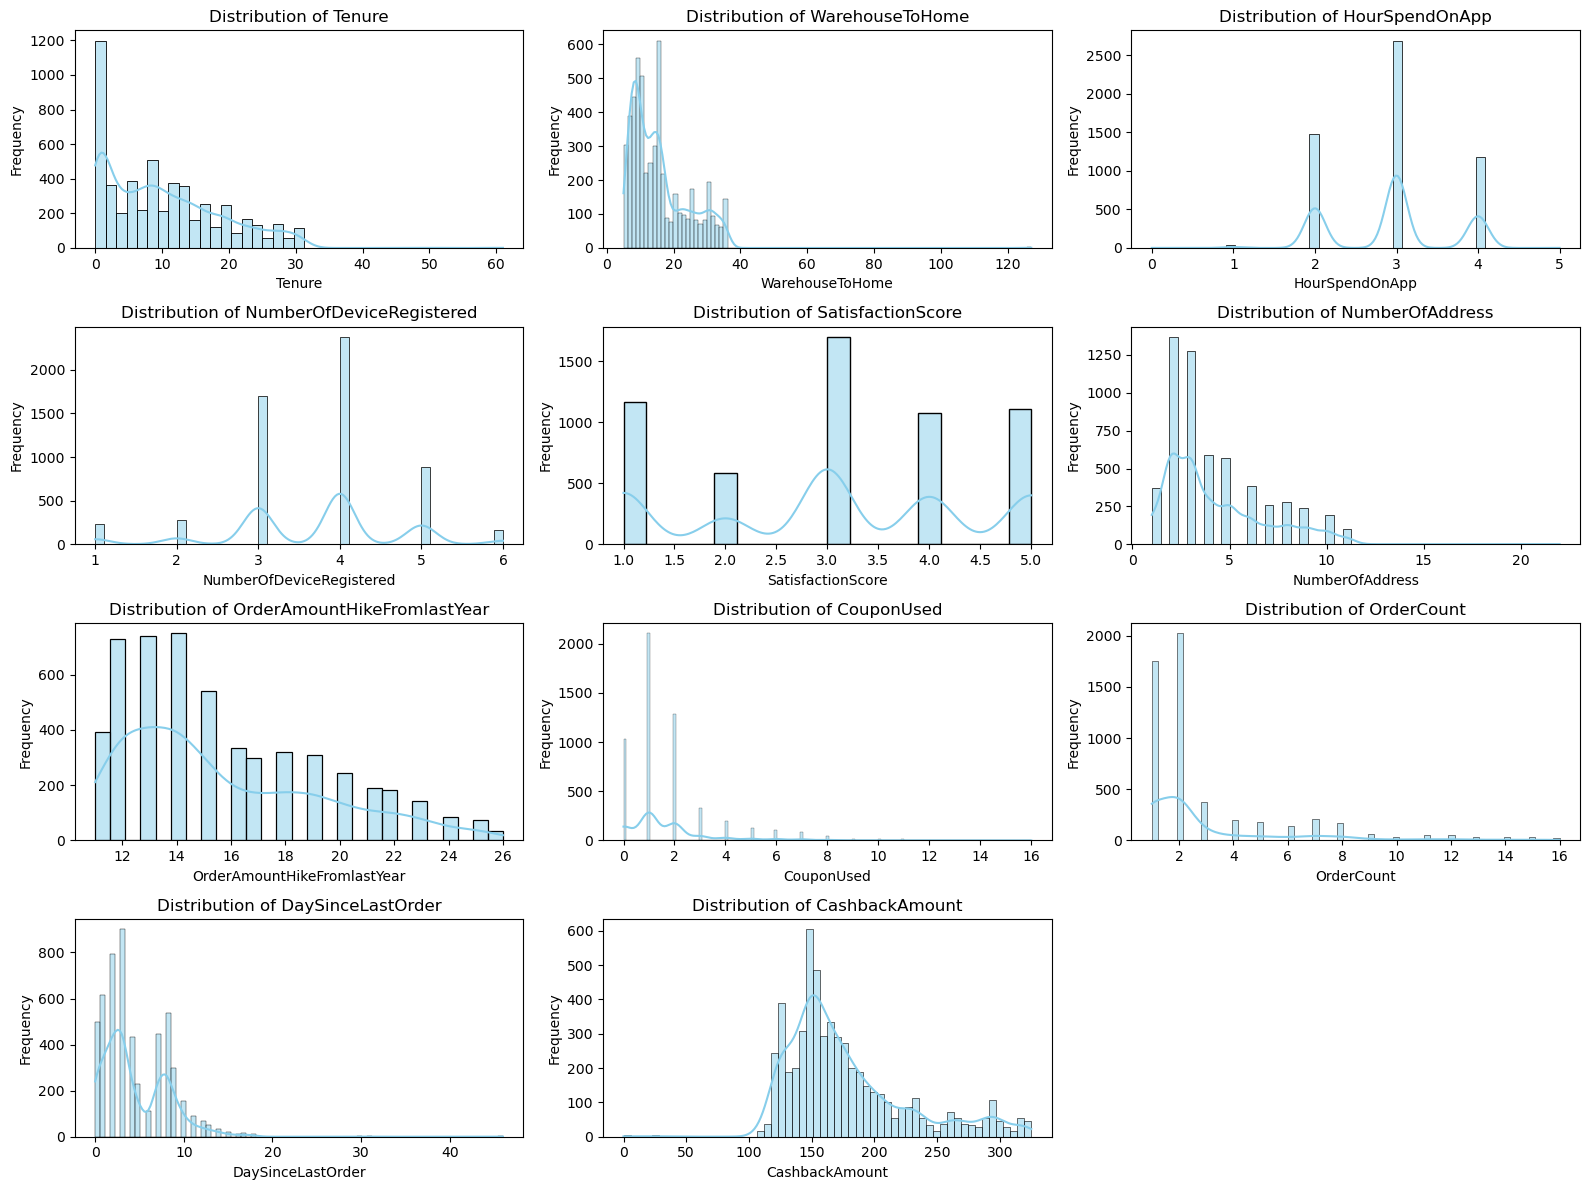

In [7]:
plt.figure(figsize=(16, 12))
for i, feature in enumerate(num_columns, 1):
    plt.subplot(4, 3, i) 
    sns.histplot(df[feature].dropna(), kde=True, color='skyblue') 
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

1. **Distribution of Tenure:**
   - Distribusi cenderung menurun. Sebagian besar pengguna memiliki tenure yang pendek (0-10 bulan), sedangkan pengguna dengan tenure lebih lama menjadi semakin sedikit.

2. **Distribution of WarehouseToHome:**
   - Data ini menunjukkan jarak (dalam satuan tertentu) antara gudang ke rumah pelanggan. Sebagian besar jarak antara gudang dan rumah berkisar dalam jarak pendek (0-20), dan jarak lebih jauh menjadi lebih jarang.

3. **Distribution of HourSpendOnApp:**
   - Distribusi berbentuk unimodal, dengan puncak utama di sekitar 3 jam. Sebagian besar pengguna menghabiskan waktu sekitar 2-4 jam di aplikasi.

4. **Distribution of NumberOfDeviceRegistered:**
   - Data ini menunjukkan jumlah perangkat yang terdaftar, dengan puncak signifikan pada angka bulat ( 3, 4, dan 5). Sebagian besar pengguna tampaknya mendaftarkan 3 hingga 5 perangkat.

5. **Distribution of SatisfactionScore:**
   - Distribusi ini hampir normal, dengan mayoritas pengguna memberikan skor kepuasan sekitar 3 hingga 4, menunjukkan tingkat kepuasan yang cukup baik.

6. **Distribution of NumberOfAddress:**
   - Sebagian besar pelanggan memiliki kurang dari 5 alamat yang terdaftar. Distribusi sangat tidak merata, dengan lebih sedikit pelanggan memiliki lebih banyak alamat.

7. **Distribution of OrderAmountHikeFromLastYear:**
   - Distribusi ini menunjukkan banyak pelanggan mengalami kenaikan jumlah pesanan di kisaran 12-20 dari tahun sebelumnya. Namun, kenaikan di atas angka tersebut menjadi semakin langka.

8. **Distribution of CouponUsed:**
   - Sebagian besar pengguna tidak menggunakan hingga  menggunakan sekitar 2 kupon, tetapi ada pengguna tertentu yang menggunakan lebih banyak kupon.

9. **Distribution of OrderCount:**
   - Sebagian besar pelanggan melakukan 1-2 pesanan. Frekuensi pelanggan dengan jumlah pesanan lebih tinggi menurun drastis.

10. **Distribution of DaySinceLastOrder:**
    - Distribusi menunjukkan sebagian besar pelanggan baru saja melakukan pesanan terakhirnya (0-10 hari yang lalu), dengan frekuensi yang turun secara eksponensial untuk hari-hari yang lebih lama.

11. **Distribution of CashbackAmount:**
    - Cashback yang diberikan sebagian besar berkisar antara 100 hingga 200. Distribusi ini relatif simetris, dengan penyebaran data yang lebih kecil di kedua sisi rata-rata. 

**Data Correlation**

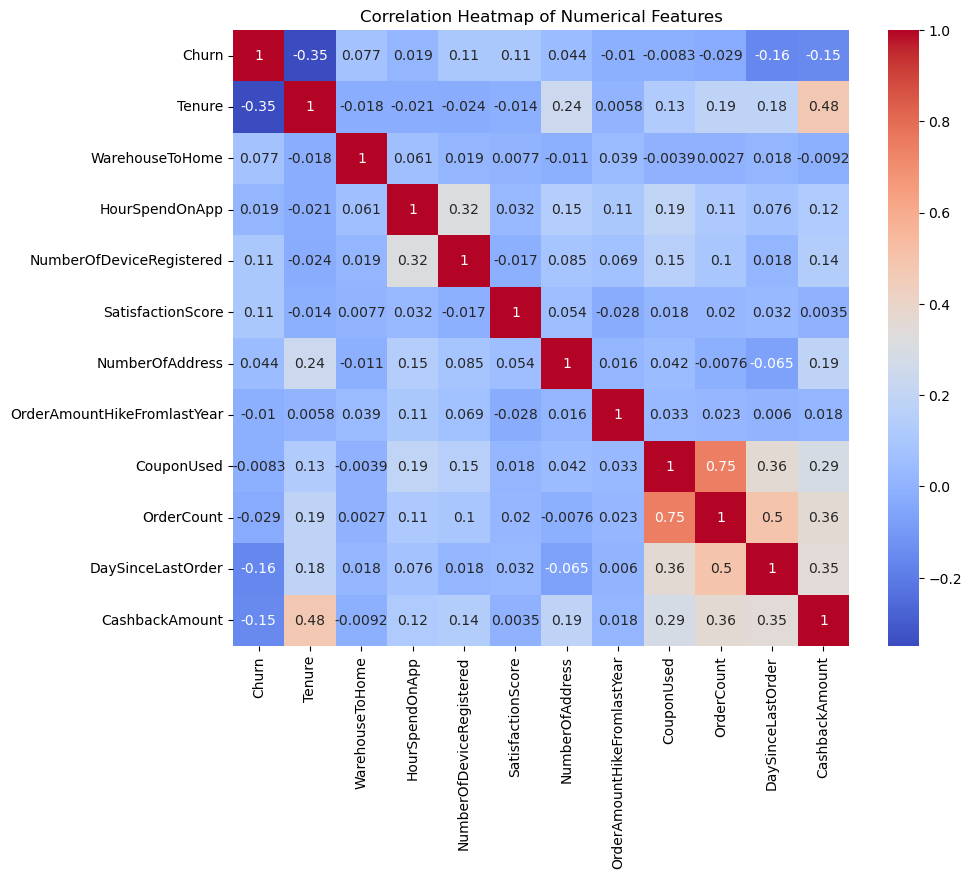

In [8]:
col = [
    'Churn','Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
    'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 
    'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'
]
correlation_matrix = df[col].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Fitur dengan dampak terbesar terhadap churn adalah Tenure dengan korelasi negatif yang signifikan, menunjukkan bahwa loyalitas pelanggan meningkat dengan waktu. DaySinceLastOrder dan CashbackAmount juga memiliki efek negatif moderat terhadap churn, yang berarti menjaga pelanggan aktif dengan cashback dapat membantu mengurangi churn. Fitur lain menunjukkan korelasi yang lemah atau tidak signifikan dengan churn.

In [9]:
cat_columns = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 
                        'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Complain']

chi2_results = {}
for feature in cat_columns:
    contingency_table = pd.crosstab(df[feature], df['Churn'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results[feature] = p

chi2_results = pd.DataFrame(list(chi2_results.items()), columns=['Feature', 'p-value'])
print("Hasil tes Chi-square untuk kolom kategorikal dengan Churn:")
print(chi2_results)

Hasil tes Chi-square untuk kolom kategorikal dengan Churn:
                Feature       p-value
0  PreferredLoginDevice  1.075692e-16
1              CityTier  1.261200e-09
2  PreferredPaymentMode  9.708709e-15
3                Gender  3.082094e-02
4      PreferedOrderCat  2.770833e-60
5         MaritalStatus  1.073011e-41
6              Complain  2.664461e-78


Semua fitur kategorikal yang diuji menunjukkan hubungan yang signifikan dengan churn (p-value < 0.05). Fitur seperti Complain, PreferedOrderCat, dan PreferredLoginDevice memiliki p-value yang sangat kecil, menandakan hubungan yang sangat kuat dengan churn. Ini menunjukkan bahwa fokus pada penanganan keluhan, pemahaman preferensi pelanggan, dan personalisasi layanan berdasarkan perangkat dan kategori pesanan dapat membantu mengurangi churn.

**Data Cardinalities**

In [10]:
listItem = []
for col in df.columns:
    unique_values = df[col].drop_duplicates().values
    sample_size = min(7, len(unique_values))
    unique_sample = list(df[col].drop_duplicates().sample(sample_size).values)
    listItem.append([col, df[col].dtype, df[col].nunique(), unique_sample])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'unique', 'uniqueSample'],
                      data=listItem)
dfDesc

,dataFeatures,dataType,unique,uniqueSample
0,CustomerID,int64,5630,"[50823, 50244, 54978, 52227, 54494, 51758, 55374]"
1,Churn,int64,2,"[0, 1]"
2,Tenure,float64,36,"[30.0, 20.0, 19.0, 0.0, 31.0, 6.0, 11.0]"
3,PreferredLoginDevice,object,3,"[Computer, Phone, Mobile Phone]"
4,CityTier,int64,3,"[3, 2, 1]"
5,WarehouseToHome,float64,34,"[nan, 26.0, 10.0, 34.0, 28.0, 14.0, 13.0]"
6,PreferredPaymentMode,object,7,"[E wallet, Debit Card, Cash on Delivery, CC, C..."
7,Gender,object,2,"[Female, Male]"
8,HourSpendOnApp,float64,6,"[4.0, nan, 2.0, 5.0, 0.0, 1.0, 3.0]"
9,NumberOfDeviceRegistered,int64,6,"[4, 5, 6, 1, 3, 2]"


Berdasarkan pengecekan nilai unik pada dataset, pada beberapa kolom, ditemukan beberapa nilai dengan penamaan yang tidak konsisten. Misalnya pada kolom PrefferedLoginDevice terdapat nilai 'Mobile Phone' dan 'Phone' yang merujuk ke perangkat yang sama. Kemudian pada kolom PreferredPaymentMode terdapat 'CC' dan 'Credit Card' yang merujuk kepada penggunaan kartu kredit, serta 'COD' dan 'Cash on Delivery' yang merujuk pada satu metode pembayaran yang sama. Selain itu, pada kolom PreferedOrderCat terdapat 'Mobile' dan 'Mobile Phone' yang merujuk pada kategori yang sama. 

**Identifying Missing Value**

In [11]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'nullCount', 'nullPercentage'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,nullCount,nullPercentage
0,CustomerID,int64,0,0.00
1,Churn,int64,0,0.00
2,Tenure,float64,264,4.69
3,PreferredLoginDevice,object,0,0.00
4,CityTier,int64,0,0.00
5,WarehouseToHome,float64,251,4.46
6,PreferredPaymentMode,object,0,0.00
7,Gender,object,0,0.00
8,HourSpendOnApp,float64,255,4.53
9,NumberOfDeviceRegistered,int64,0,0.00


Terdapat 7 kolom yang memiliki missing value, Tenure, WerehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder. 

<Axes: >

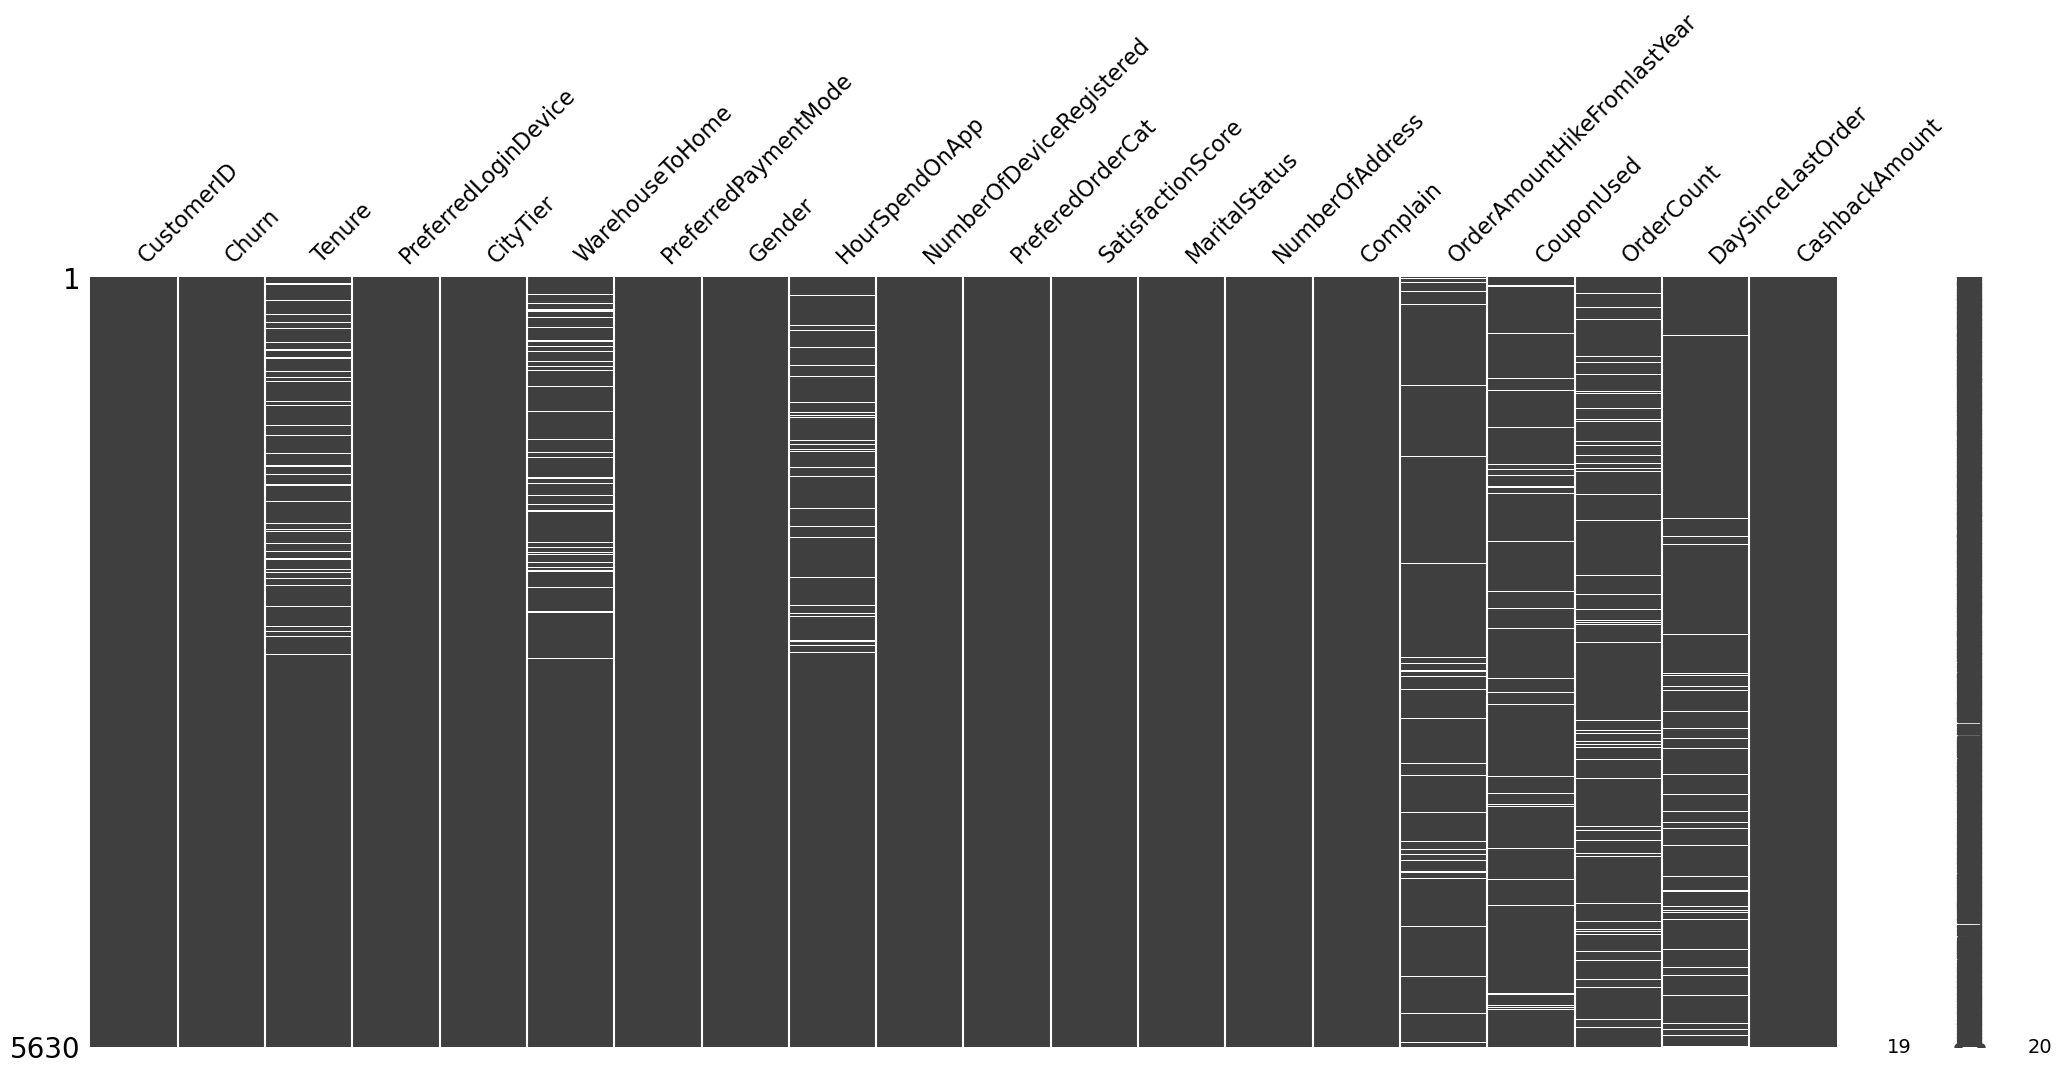

In [12]:
msno.matrix(df)

Missing value pada dateset ini dapat diklasifikasikan menjadi 3, yaitu: 

1. Missing Completely at Random (MCAR)
Data MCAR adalah data yang nilai hilangnya tidak memiliki pola tertentu. Fitur WarehouseToHome dan HourSpendOnApp mungkin termasuk dalam kategori MCAR, karena waktu yang dihabiskan di aplikasi atau jarak ke gudang mungkin tidak bergantung pada fitur lainnya.
- Pendekatan Penanganan: Karena data MCAR tidak bergantung pada fitur lain, nilai yang hilang dapat diisi dengan nilai rata-rata atau median tanpa menimbulkan bias yang berarti.

2. Missing at Random (MAR)
Nilai hilang pada MAR berkaitan dengan data lain yang teramati. Fitur seperti Tenure dan OrderAmountHikeFromlastYear bisa termasuk MAR, karena pelanggan dengan masa penggunaan yang lebih singkat mungkin memiliki lebih banyak data yang hilang, dan kebiasaan belanja (sehingga kenaikan jumlah order) dapat berkorelasi dengan masa penggunaan atau waktu penggunaan aplikasi.
- Pendekatan Penanganan: Untuk data MAR, metode seperti imputasi berdasarkan fitur yang terkait (misalnya, menggunakan pengelompokan berdasarkan masa penggunaan untuk mengisi nilai hilang) atau model prediktif dapat digunakan untuk mengisi nilai hilang berdasarkan pola dalam data yang teramati.

3. Missing Not at Random (MNAR)
MNAR terjadi ketika nilai hilang terkait dengan nilai dari fitur itu sendiri. Fitur CouponUsed, OrderCount, dan DaySinceLastOrder mungkin termasuk MNAR jika, misalnya, pelanggan yang jarang menggunakan kupon atau jarang memesan memiliki nilai hilang pada fitur-fitur ini, atau ada periode tanpa pesanan baru.
- Pendekatan Penanganan: Untuk MNAR, strategi yang efektif meliputi membuat variabel indikator untuk menandai tempat data hilang, karena hilangnya nilai ini bisa saja memiliki informasi penting. Alternatifnya, bisa dipertimbangkan imputasi berdasarkan pengetahuan spesifik domain atau memodelkan missingness langsung jika memungkinkan.

Langkah Selanjutnya
Untuk menangani missing value ini:
- MCAR: Gunakan imputasi median.
- MAR:  KNN Imputer.
- MNAR: Buat variabel indikator dan gunakan pengetahuan spesifik domain atau pertimbangkan strategi imputasi lanjutan seperti iterative imputer.

**Note**: Imputasi data dilakukan terpisah berdasarkan nilai variabel kategori `Churn`. Untuk baris dengan kategori tertentu, nilai yang hilang diimputasi menggunakan median dan KNN dari subset data yang memiliki kategori yang sama. Hal ini memastikan bahwa imputasi dilakukan sesuai dengan distribusi data dalam masing-masing grup kategori tersebut.

**Identifying Duplicates**

In [13]:
df[df.duplicated()].shape[0]

0

Dapat dilihat bahwa tidak terdapat data duplikat yang teridentifikasi. 

**Identifying Outliers**

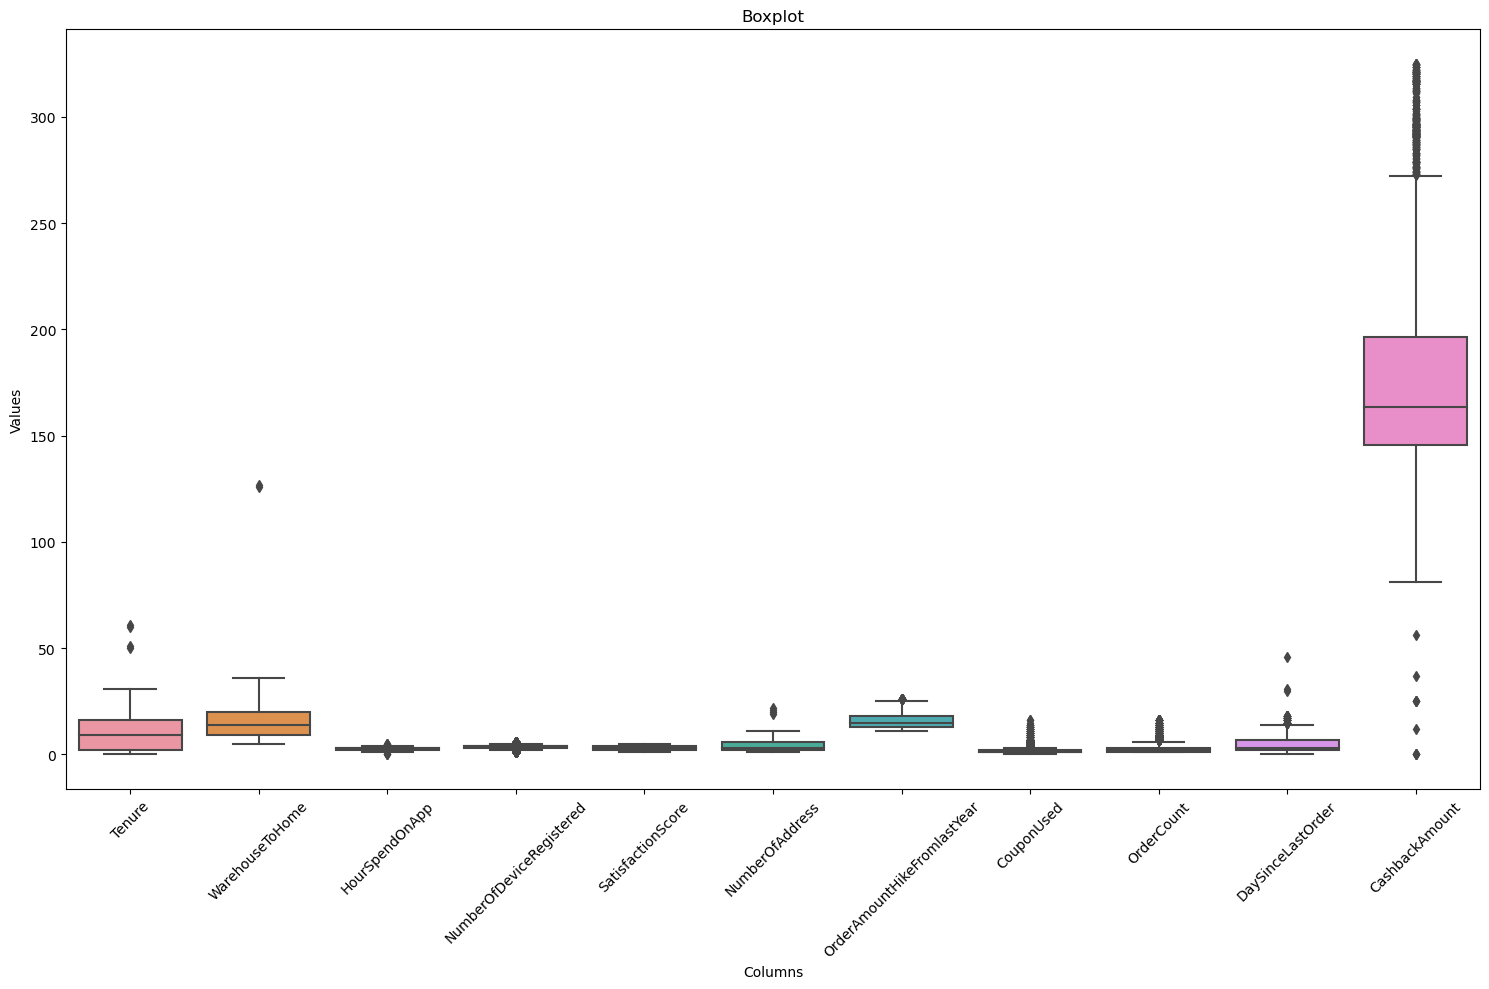

In [14]:
num_columns = [
    'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
    'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 
    'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'
]

plt.figure(figsize=(15, 10))  
sns.boxplot(data=df[num_columns])
plt.title('Boxplot')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

Outliers pada dataset dapat dilihat melalui boxplot yang telah dilakukan sebelumnya untuk melihat distribusi data. Pada grafik tersebut dapat dilihat bahwa hampir seluruh kolom numerikal, kecuali SatisfactionScore, memiliki nilai outliers. Selanjutnya, dapat dicari berapa banyak outliers dari masing-masing kolom. 

In [15]:
def count_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers.shape[0]

outliers_counts = {col: count_outliers(df, col) for col in num_columns}

for col, count in outliers_counts.items():
    print(f"{col}: {count} outliers")

Tenure: 4 outliers
WarehouseToHome: 2 outliers
HourSpendOnApp: 6 outliers
NumberOfDeviceRegistered: 397 outliers
SatisfactionScore: 0 outliers
NumberOfAddress: 4 outliers
OrderAmountHikeFromlastYear: 33 outliers
CouponUsed: 629 outliers
OrderCount: 703 outliers
DaySinceLastOrder: 62 outliers
CashbackAmount: 438 outliers


Berdasarkan hasil pengecekan, data yang termasuk ke dalam outliers dapat dikatakan cukup banyak sehingga penghapusan mungkin akan mempengaruhi hasil analisis. Pendekatan penanganan outliers yang dilakukan adalah mengganti nilai outliers dengan nilai ambang batas yang dihitung berdasarkan upper range dan lower range dari masing-masing kolom. Hal ini dilakukan mengurangi pengaruh nilai ekstrim tersebut terhadap model atau analisis tanpa menghapus data. 

### **Data Preprocessing**

In [16]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,unique,uniqueSample
0,CustomerID,int64,5630,"[53552, 55274]"
1,Churn,int64,2,"[0, 1]"
2,Tenure,float64,36,"[17.0, 19.0]"
3,PreferredLoginDevice,object,3,"[Computer, Mobile Phone]"
4,CityTier,int64,3,"[2, 1]"
5,WarehouseToHome,float64,34,"[20.0, 11.0]"
6,PreferredPaymentMode,object,7,"[Credit Card, COD]"
7,Gender,object,2,"[Female, Male]"
8,HourSpendOnApp,float64,6,"[5.0, 1.0]"
9,NumberOfDeviceRegistered,int64,6,"[6, 5]"


Pada beberapa kolom, ditemukan beberapa nilai yang tidak konsisten. Misalnya pada kolom PrefferedLoginDevice terdapat nilai 'Mobile Phone' dan 'Phone' yang merujuk ke perangkat yang sama. Oleh karenanya, dilakukan replace value untuk menangani hal ini. Selain kolom PrefferedLoginDevice, pada kolom PreferredPaymentMode dan PreferedOrderCat juga ditemukan hal yang sama.

In [17]:
df['PreferredLoginDevice'].replace('Phone', 'Mobile Phone', inplace=True)
df['PreferredPaymentMode'].replace({'CC': 'Credit Card', 'COD': 'Cash on Delivery'}, inplace=True)
df['PreferedOrderCat'].replace('Mobile' , 'Mobile Phone', inplace=True)

***Missing Values***

In [18]:
df.isna().sum()/df.shape[0]*100

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

Terdapat 7 kolom yang memiliki missing value, Tenure, WerehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder

In [19]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Ringkasan dari pengecekan nilai null pada dataset dapat dilihat melalui tabel berikut:

In [20]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'nullCount', 'nullPercentage'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,nullCount,nullPercentage
0,CustomerID,int64,0,0.00
1,Churn,int64,0,0.00
2,Tenure,float64,264,4.69
3,PreferredLoginDevice,object,0,0.00
4,CityTier,int64,0,0.00
5,WarehouseToHome,float64,251,4.46
6,PreferredPaymentMode,object,0,0.00
7,Gender,object,0,0.00
8,HourSpendOnApp,float64,255,4.53
9,NumberOfDeviceRegistered,int64,0,0.00


Berdasarkan identifikasi missing value sebelumnya, penanganan missing value untuk kolom Tenure dan OrderAmountHikeFromLastYear akan ditangani dengan menggunakan KNNImputer. Sedangkan pada kolom WareHouseToHome dan HourSpendOnApp akan menggunakan nilai median dari masing-masing kolom. 

In [21]:
knn_imputer = KNNImputer(n_neighbors=5)

df.loc[df['Churn'] == 0, ['Tenure', 'OrderAmountHikeFromlastYear']] = knn_imputer.fit_transform(
    df.loc[df['Churn'] == 0, ['Tenure', 'OrderAmountHikeFromlastYear']]
)

df.loc[df['Churn'] == 1, ['Tenure', 'OrderAmountHikeFromlastYear']] = knn_imputer.fit_transform(
    df.loc[df['Churn'] == 1, ['Tenure', 'OrderAmountHikeFromlastYear']]
)

In [22]:
median_imputer = SimpleImputer(strategy='median')

df.loc[df['Churn'] == 0, ['WarehouseToHome', 'HourSpendOnApp']] = median_imputer.fit_transform(
    df.loc[df['Churn'] == 0, ['WarehouseToHome', 'HourSpendOnApp']]
)

df.loc[df['Churn'] == 1, ['WarehouseToHome', 'HourSpendOnApp']] = median_imputer.fit_transform(
    df.loc[df['Churn'] == 1, ['WarehouseToHome', 'HourSpendOnApp']]
)

Penanganan untuk MNAR 

1. CouponUsed  
   - Nilai yang hilang pada CouponUsed dapat terjadi jika pelanggan jarang atau bahkan tidak pernah menggunakan kupon. Pendekatan yang dapat dilakukan adalah mengisi nilai hilang dengan nilai 0 (untuk menandakan bahwa kupon tidak digunakan), atau membuat variabel indikator yang mencatat nilai hilang sebagai kategori khusus, misalnya “Tidak Digunakan”.
   - Penggunaan kupon umumnya bersifat sporadis atau preferensi tertentu, sehingga asumsi ini logis.

2. OrderCount  
   - Pada OrderCount, nilai hilang dapat diasumsikan sebagai tidak adanya pesanan pada periode tertentu. Pendekatan ini dapat diatasi dengan mengisi nilai hilang dengan angka 0 atau membuat indikator khusus untuk menunjukkan adanya periode non-pesanan.
   - Banyak e-commerce mencatat periode tanpa aktivitas pesanan, sehingga nilai 0 atau variabel indikator dapat memberikan wawasan lebih lanjut.


In [23]:
df['CouponUsed'] = df['CouponUsed'].fillna(0)
df['OrderCount'] = df['OrderCount'].fillna(0)

3. DaySinceLastOrder  
   - Jika missing values di kolom DaySinceLastOrder menggambarkan ketidakaktifan atau ketiadaan pesanan, mengisi nilai hilang dengan perkiraan tertentu bisa menyesatkan. Menambahkan variabel indikator (flag) untuk menunjukkan pelanggan yang memiliki nilai missing di kolom ini dapat memberikan insight tambahan. Ini sangat berguna karena memungkinkan analisis terpisah antara pelanggan yang aktif dan tidak aktif.
   - Tambahkan kolom baru, misalnya NoLastOrderInfo, yang berisi nilai 1 jika DaySinceLastOrder hilang dan 0 jika tidak. Setelah menandai, nilai hilang di DaySinceLastOrder bisa diisi dengan nilai median atau mean.
   - Jika pelanggan tertentu tidak pernah memesan, isi nilai hilangnya dengan median dan berikan indikator 1 pada kolom NoLastOrderInfo. Dengan demikian, kita dapat menyegmentasi pelanggan berdasarkan aktivitas mereka.
   - Dengan pendekatan ini, kita menggunakan konteks operasional dari e-commerce untuk memastikan bahwa pengisian nilai hilang tetap memberikan informasi yang relevan dan tidak mengaburkan pola dalam data.

In [24]:
df['NoLastOrderInfo'] = df['DaySinceLastOrder'].isna().astype(int)

In [25]:
median_imputer = SimpleImputer(strategy='median')

df.loc[df['Churn'] == 0, ['DaySinceLastOrder']] = median_imputer.fit_transform(
    df.loc[df['Churn'] == 0, ['DaySinceLastOrder']]
)

df.loc[df['Churn'] == 1, ['DaySinceLastOrder']] = median_imputer.fit_transform(
    df.loc[df['Churn'] == 1, ['DaySinceLastOrder']]
)

In [26]:
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
NoLastOrderInfo                0
dtype: int64

***Outliers***

In [27]:
num_columns = [
    'Tenure','WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
    'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 
    'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'
]

def count_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers.shape[0]

outliers_counts = {col: count_outliers(df, col) for col in num_columns}

for col, count in outliers_counts.items():
    print(f"{col}: {count} outliers")

Tenure: 4 outliers
WarehouseToHome: 2 outliers
HourSpendOnApp: 6 outliers
NumberOfDeviceRegistered: 397 outliers
SatisfactionScore: 0 outliers
NumberOfAddress: 4 outliers
OrderAmountHikeFromlastYear: 33 outliers
CouponUsed: 629 outliers
OrderCount: 703 outliers
DaySinceLastOrder: 62 outliers
CashbackAmount: 438 outliers


Berdasarkan hasil identifikasi sebelumnya, data yang termasuk ke dalam outliers dapat dikatakan cukup banyak sehingga penghapusan memiliki potentsi untuk mempengaruhi hasil analisis. Pendekatan penanganan outliers yang dilakukan adalah mengganti nilai outliers dengan nilai ambang batas yang dihitung berdasarkan upper range dan lower range dari masing-masing kolom. Hal ini dilakukan mengurangi pengaruh nilai ekstrim tersebut terhadap model atau analisis tanpa menghapus data. 

In [28]:
num_columns = [
    'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
    'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 
    'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'
]

def replace_outliers_with_bounds(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    data[col] = data[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    
    return data

for col in num_columns:
    df = replace_outliers_with_bounds(df, col)

In [29]:
outliers_counts = {col: count_outliers(df, col) for col in num_columns}

for col, count in outliers_counts.items():
    print(f"{col}: {count} outliers")

Tenure: 0 outliers
WarehouseToHome: 0 outliers
HourSpendOnApp: 0 outliers
NumberOfDeviceRegistered: 0 outliers
SatisfactionScore: 0 outliers
NumberOfAddress: 0 outliers
OrderAmountHikeFromlastYear: 0 outliers
CouponUsed: 0 outliers
OrderCount: 0 outliers
DaySinceLastOrder: 0 outliers
CashbackAmount: 0 outliers


***Remove Unused Data***

Beriktunya, dapat dilakukan penghapusan kolom yang tidak digunakan untuk analisis, yaitu kolom Customer ID. Kolom CustomerID dapat dihapus karena berisi ID unik pelanggan, dimana ID ini tidak memberikan informasi langsung tentang perilaku atau faktor churn.

In [30]:
df.drop(columns=['CustomerID'], inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   float64
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   float64
 13  Complain          

### **Data Analysis**

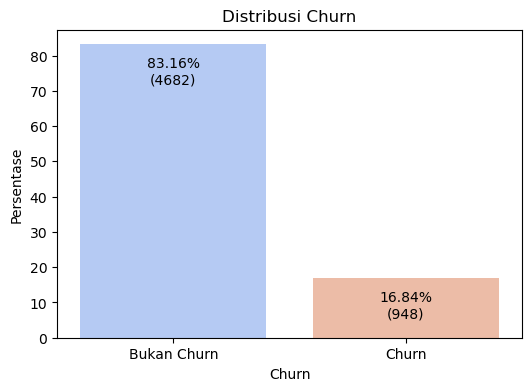

In [32]:
churn_counts = df['Churn'].value_counts()
churn_percent = df['Churn'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_percent.values, palette='coolwarm')

for i, (count, percent) in enumerate(zip(churn_counts.values, churn_percent.values)):
    plt.text(i, percent - 12, f'{percent:.2f}%\n({count})', ha='center', va='bottom', color='black')

plt.title('Distribusi Churn')
plt.xlabel('Churn')
plt.ylabel('Persentase')
plt.xticks([0, 1], ['Bukan Churn', 'Churn'])
plt.show()

Distribusi churn menunjukkan bahwa 83.16% pelanggan (4682) masih aktif, sementara 16.84% (948) pelanggan telah churn. Analisis ini penting untuk menjawab "mengapa" churn terjadi dan bagaimana mencegahnya. Pelanggan yang churn cenderung menjadi hasil dari pengalaman buruk, ketidakpuasan, atau kurangnya keterikatan terhadap layanan. Tingkat churn sebesar 16.84% berarti ada potensi kehilangan hampir 1 dari 6 pelanggan, yang dapat berdampak signifikan pada pendapatan. Secara kuantitatif, ini mencerminkan tantangan yang signifikan dalam retensi pelanggan. 

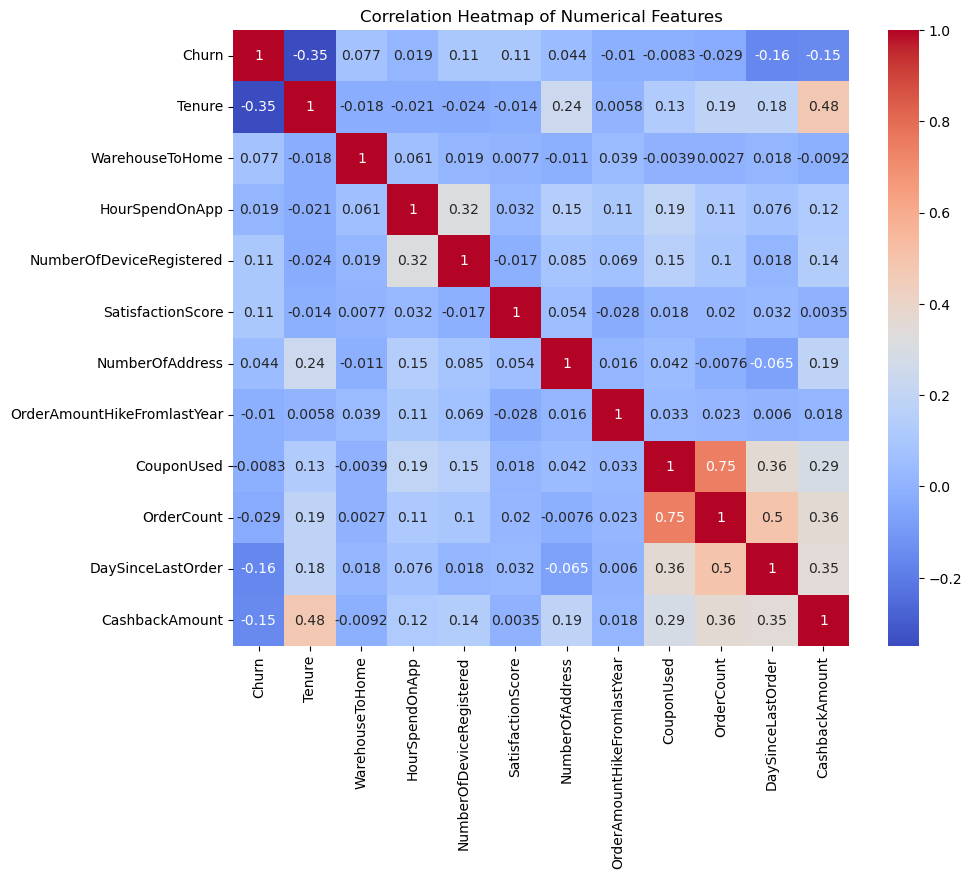

In [33]:
col = [
    'Churn','Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
    'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 
    'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'
]
correlation = df[col].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Berdasarkan heatmap korelasi variabel numerik terhadap **Churn**, beberapa insight menarik dapat diidentifikasi. Variabel **Tenure** memiliki korelasi negatif yang cukup signifikan (-0.35) dengan churn, menunjukkan bahwa pelanggan dengan masa keanggotaan lebih lama cenderung lebih kecil kemungkinannya untuk churn. Selain itu, **DaySinceLastOrder** juga memiliki korelasi negatif moderat (-0.16), yang mengindikasikan bahwa pelanggan yang melakukan pesanan baru-baru ini cenderung tidak churn. Sebaliknya, fitur seperti **SatisfactionScore**, **NumberOfDeviceRegistered**, dan **CashbackAmount** memiliki korelasi positif kecil dengan churn (0.11), namun dampaknya relatif lebih lemah. 

- **Insight:** Pelanggan dengan tenure pendek atau yang jarang melakukan pesanan terbaru lebih berisiko untuk churn. 
- **Rekomendasi:** Fokus pada retensi pelanggan baru dengan meningkatkan program onboarding, menawarkan insentif untuk pesanan pertama, serta memperhatikan pengalaman mereka di awal perjalanan pelanggan. 
- **Aksi:** Identifikasi pelanggan dengan tenure pendek dan waktu lama sejak pesanan terakhir, lalu tawarkan promosi atau komunikasi personal untuk meningkatkan keterlibatan dan mengurangi risiko churn. Kombinasi strategi ini dapat secara efektif mempertahankan pelanggan dalam ekosistem layanan.

**Churn dengan PreferredLoginDevice**

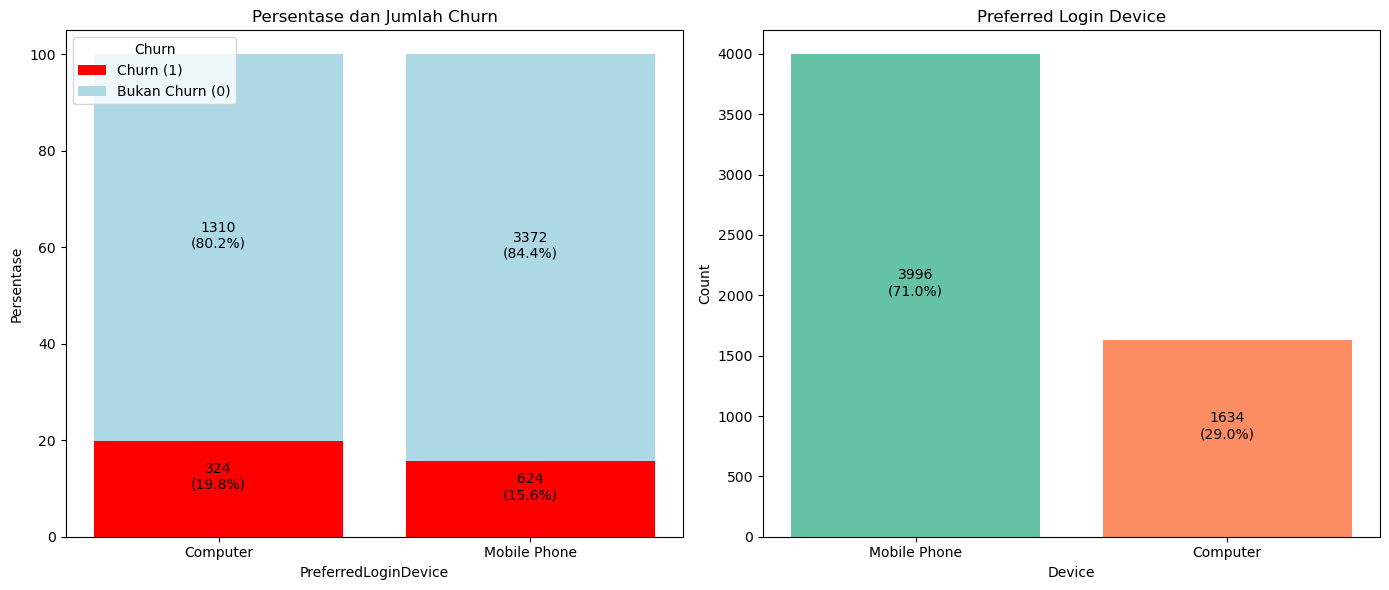

In [43]:
summary = df['PreferredLoginDevice'].value_counts()
percentages = (summary / summary.sum()) * 100

churn_counts = df.groupby(['PreferredLoginDevice', 'Churn']).size().unstack(fill_value=0)
churn_percent = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(churn_percent.index, churn_percent[1], label='Churn (1)', color='red')
axes[0].bar(churn_percent.index, churn_percent[0], bottom=churn_percent[1], label='Bukan Churn (0)', color='lightblue')

for i, device in enumerate(churn_percent.index):
    axes[0].text(i, churn_percent[1][i] / 2, f'{churn_counts[1][i]}\n({churn_percent[1][i]:.1f}%)', ha='center', color='black')
    axes[0].text(i, churn_percent[1][i] + churn_percent[0][i] / 2, f'{churn_counts[0][i]}\n({churn_percent[0][i]:.1f}%)', ha='center', color='black')

axes[0].set_title('Persentase dan Jumlah Churn')
axes[0].set_xlabel('PreferredLoginDevice')
axes[0].set_ylabel('Persentase')
axes[0].legend(title='Churn', loc='upper left')

axes[1].bar(summary.index, summary, color=sns.color_palette('Set2'))
for idx, (count, percentage) in enumerate(zip(summary, percentages)):
    axes[1].text(idx, count / 2, f'{count}\n({percentage:.1f}%)', ha='center', color='black')

axes[1].set_title('Preferred Login Device')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Device')

plt.tight_layout()
plt.show()

Dalam analisis ini, kita melihat perbedaan tingkat churn berdasarkan perangkat login yang disukai pelanggan. Pengguna komputer memiliki tingkat churn lebih tinggi, yaitu 19.8% (324 dari 1634 pelanggan), dibandingkan pengguna ponsel dengan 15.6% (624 dari 3996 pelanggan). Sebaliknya, pengguna ponsel menunjukkan tingkat retensi yang lebih tinggi (84.4%) dibandingkan pengguna komputer (80.2%). Fakta ini mengisyaratkan bahwa pengguna komputer mungkin menghadapi tantangan yang memengaruhi pengalaman mereka, seperti antarmuka pengguna yang kurang optimal atau keterbatasan fitur dibandingkan pengguna ponsel yang cenderung lebih terlayani. 

- **Insight:** Pengguna komputer merupakan segmen yang lebih rentan churn dan membutuhkan perhatian khusus. 
- **Rekomendasi:** Tingkatkan pengalaman pengguna komputer dengan optimalisasi platform, seperti memperbaiki desain, kecepatan akses, dan ketersediaan fitur yang setara dengan aplikasi ponsel. 
- **Aksi:** Luncurkan kampanye survei untuk memahami kebutuhan pengguna komputer lebih dalam, sambil menawarkan insentif seperti diskon khusus kepada segmen ini untuk meningkatkan retensi dan menurunkan churn. 

**Churn dengan CityTier**

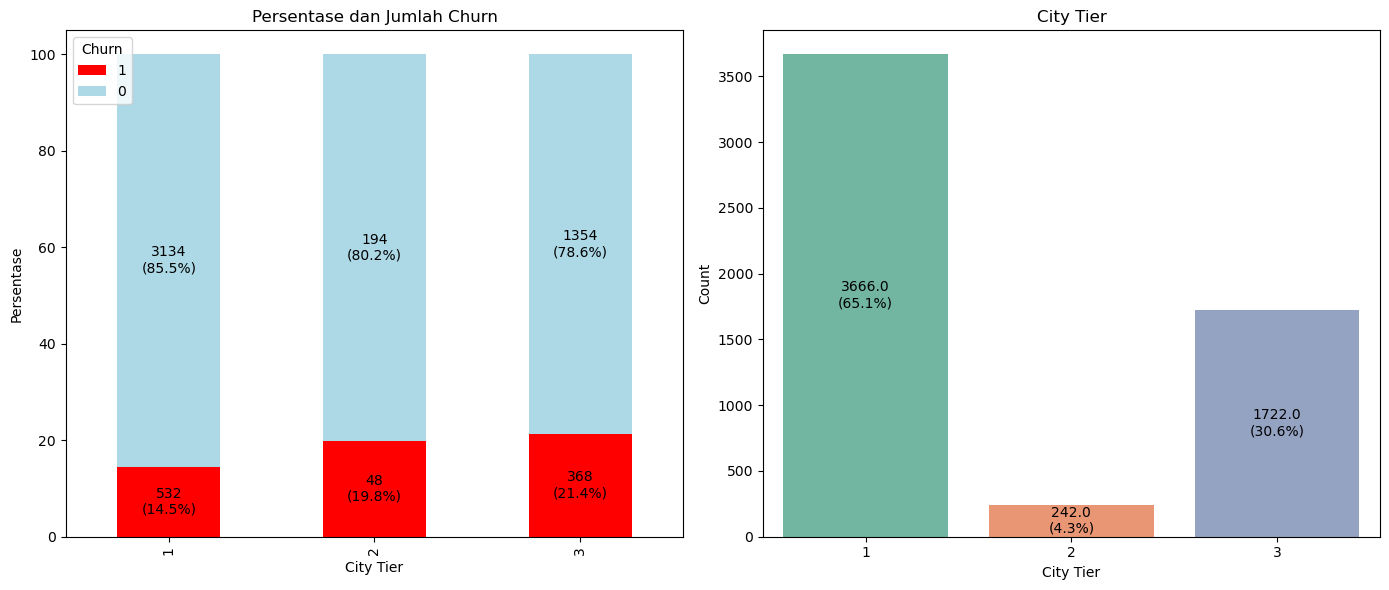

In [ ]:
churn_counts = df.groupby(['CityTier', 'Churn']).size().unstack(fill_value=0)
churn_percent = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

churn_percent[[1, 0]].plot(kind='bar', stacked=True, ax=axes[0], color=['red', 'lightblue'])
for i, (row, tier) in enumerate(churn_percent.iterrows()):
    axes[0].text(i, tier[1] / 2, f'{churn_counts.loc[tier.name, 1]}\n({tier[1]:.1f}%)',
                 ha='center', va='center', color='black')
    axes[0].text(i, tier[1] + tier[0] / 2, f'{churn_counts.loc[tier.name, 0]}\n({tier[0]:.1f}%)',
                 ha='center', va='center', color='black')

axes[0].set_title('Persentase dan Jumlah Churn')
axes[0].set_xlabel('City Tier')
axes[0].set_ylabel('Persentase')
axes[0].legend(title='Churn', loc='upper left')

sns.countplot(x='CityTier', data=df, ax=axes[1], palette='Set2')

for p in axes[1].patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    axes[1].text(x, height / 2, f'{height}\n({(height/df.shape[0])*100:.1f}%)',
                 ha='center', va='center', color='black')

axes[1].set_title('City Tier')
axes[1].set_xlabel('City Tier')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


Analisis churn berdasarkan **CityTier** menunjukkan bahwa pelanggan dari tier 3 memiliki tingkat churn tertinggi sebesar 21.4% (368 dari 1722 pelanggan), diikuti oleh tier 2 dengan tingkat churn 19.8% (48 dari 242 pelanggan), dan tier 1 dengan tingkat churn terendah sebesar 14.5% (532 dari 3666 pelanggan). Tier 1 juga memiliki tingkat retensi pelanggan yang paling tinggi, yaitu 85.5%, dibandingkan dengan tier 3 yang hanya sebesar 78.6%. Fakta ini mengindikasikan bahwa pelanggan dari kota-kota di tier 3 cenderung lebih rentan untuk churn, kemungkinan karena faktor aksesibilitas layanan, tingkat kepuasan, atau kebutuhan spesifik yang kurang terpenuhi. 

- **Insight:** Tingkat churn yang lebih tinggi di tier 3 menyoroti adanya kebutuhan untuk pendekatan yang lebih personal di wilayah tersebut, seperti meningkatkan layanan pelanggan atau menawarkan promosi yang relevan. 
- **Rekomendasi:** Lakukan penelitian untuk memahami tantangan spesifik di tier 3, seperti kualitas layanan, infrastruktur, atau kesesuaian produk. 
- **Aksi:** Tingkatkan pengalaman pelanggan di tier 3 melalui penguatan layanan logistik, diskon khusus, dan kampanye pemasaran yang sesuai dengan kebutuhan lokal untuk menurunkan tingkat churn.

**Churn dengan PreferredPaymentMode**

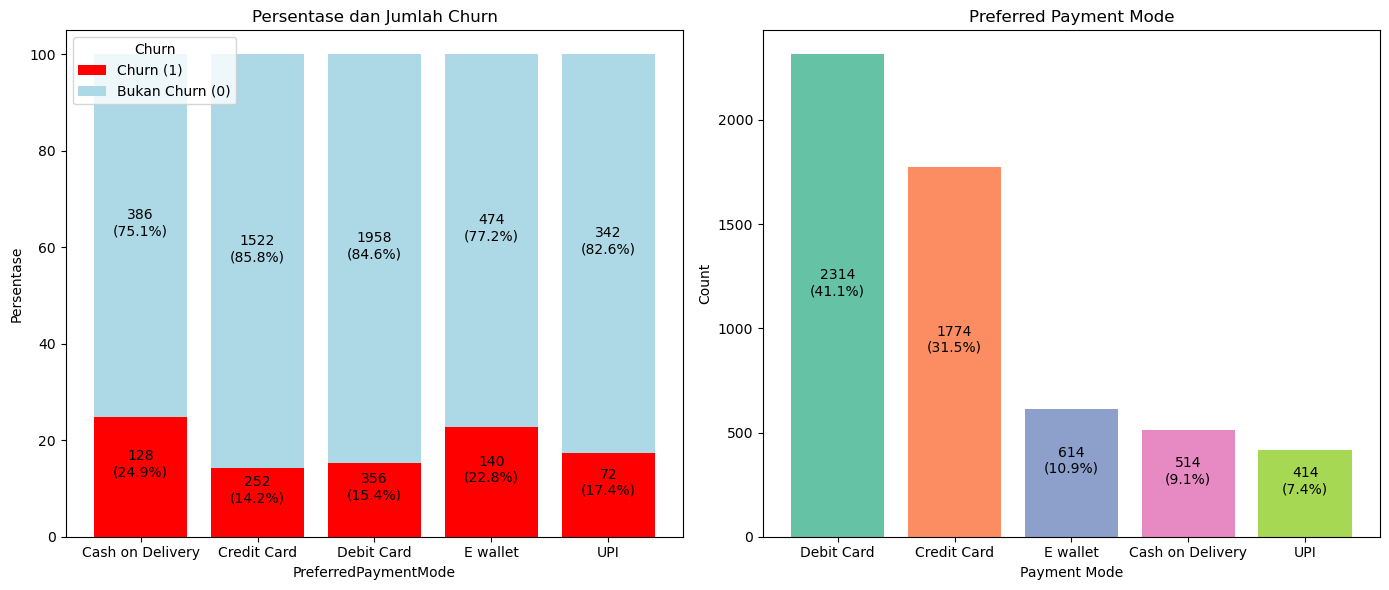

In [46]:
summary = df['PreferredPaymentMode'].value_counts()
percentages = (summary / summary.sum()) * 100

churn_counts = df.groupby(['PreferredPaymentMode', 'Churn']).size().unstack(fill_value=0)
churn_percent = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(churn_percent.index, churn_percent[1], label='Churn (1)', color='red')
axes[0].bar(churn_percent.index, churn_percent[0], bottom=churn_percent[1], label='Bukan Churn (0)', color='lightblue')

for i, device in enumerate(churn_percent.index):
    axes[0].text(i, churn_percent[1][i] / 2, f'{churn_counts[1][i]}\n({churn_percent[1][i]:.1f}%)', ha='center', color='black')
    axes[0].text(i, churn_percent[1][i] + churn_percent[0][i] / 2, f'{churn_counts[0][i]}\n({churn_percent[0][i]:.1f}%)', ha='center', color='black')

axes[0].set_title('Persentase dan Jumlah Churn')
axes[0].set_xlabel('PreferredPaymentMode')
axes[0].set_ylabel('Persentase')
axes[0].legend(title='Churn', loc='upper left')

axes[1].bar(summary.index, summary, color=sns.color_palette('Set2'))
for idx, (count, percentage) in enumerate(zip(summary, percentages)):
    axes[1].text(idx, count / 2, f'{count}\n({percentage:.1f}%)', ha='center', color='black')

axes[1].set_title('Preferred Payment Mode')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Payment Mode')

plt.tight_layout()
plt.show()

Dari analisis churn berdasarkan **PreferredPaymentMode**, terlihat bahwa metode pembayaran **Cash on Delivery (COD)** memiliki tingkat churn tertinggi, yaitu 24.9% (128 dari 514 pelanggan), diikuti oleh **E-Wallet** sebesar 22.8% (140 dari 614 pelanggan). Sebaliknya, metode **Credit Card** memiliki tingkat churn terendah sebesar 14.2% (252 dari 1774 pelanggan), diikuti oleh **UPI** sebesar 17.4% (72 dari 414 pelanggan). Pelanggan dengan metode COD tampaknya lebih rentan untuk churn, mungkin karena pengalaman pembayaran yang tidak nyaman atau preferensi mereka terhadap fleksibilitas pembayaran lainnya. 

- **Insight:** Tingginya churn pada COD dapat mengindikasikan perlunya edukasi atau promosi terhadap metode pembayaran digital yang lebih nyaman seperti UPI atau E-Wallet. 
- **Rekomendasi:** Fokuskan inisiatif pada promosi pembayaran digital melalui diskon khusus atau cashback untuk pelanggan yang beralih dari COD ke metode digital. 
- **Aksi:** Bangun program insentif untuk mempromosikan pembayaran digital dan sekaligus melakukan survei untuk memahami kendala pelanggan COD, sehingga strategi dapat lebih efektif dalam menurunkan tingkat churn.

**Churn dengan Gender**


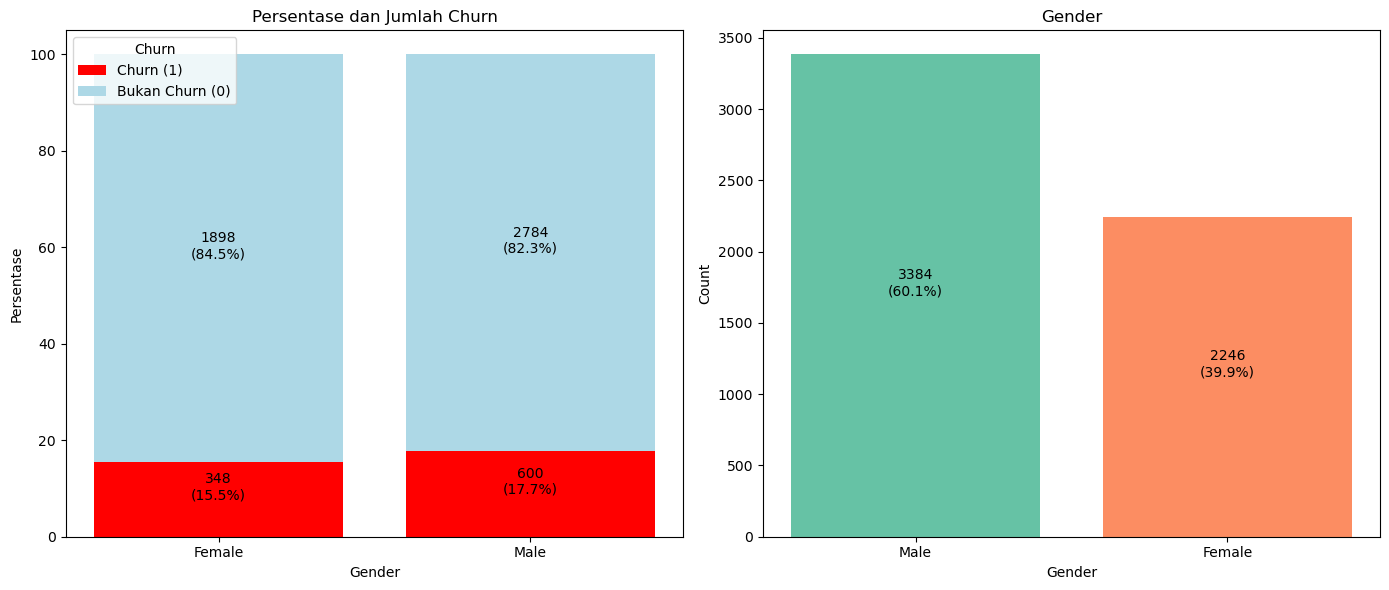

In [47]:
summary = df['Gender'].value_counts()
percentages = (summary / summary.sum()) * 100

churn_counts = df.groupby(['Gender', 'Churn']).size().unstack(fill_value=0)
churn_percent = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(churn_percent.index, churn_percent[1], label='Churn (1)', color='red')
axes[0].bar(churn_percent.index, churn_percent[0], bottom=churn_percent[1], label='Bukan Churn (0)', color='lightblue')

for i, device in enumerate(churn_percent.index):
    axes[0].text(i, churn_percent[1][i] / 2, f'{churn_counts[1][i]}\n({churn_percent[1][i]:.1f}%)', ha='center', color='black')
    axes[0].text(i, churn_percent[1][i] + churn_percent[0][i] / 2, f'{churn_counts[0][i]}\n({churn_percent[0][i]:.1f}%)', ha='center', color='black')

axes[0].set_title('Persentase dan Jumlah Churn')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Persentase')
axes[0].legend(title='Churn', loc='upper left')

axes[1].bar(summary.index, summary, color=sns.color_palette('Set2'))
for idx, (count, percentage) in enumerate(zip(summary, percentages)):
    axes[1].text(idx, count / 2, f'{count}\n({percentage:.1f}%)', ha='center', color='black')

axes[1].set_title('Gender')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Gender')

plt.tight_layout()
plt.show()


Berdasarkan analisis churn berdasarkan **Gender**, terlihat bahwa pelanggan pria memiliki tingkat churn yang lebih tinggi, yaitu 17.7% (600 dari 3384 pelanggan), dibandingkan dengan pelanggan wanita yang memiliki tingkat churn sebesar 15.5% (348 dari 2246 pelanggan). Sebaliknya, tingkat retensi pelanggan wanita (84.5%) lebih tinggi dibandingkan pria (82.3%). Perbedaan ini meskipun tidak terlalu besar, menunjukkan bahwa pelanggan pria lebih rentan churn, yang dapat disebabkan oleh perbedaan preferensi, kebutuhan, atau pengalaman layanan. 

- **Insight:** Pelanggan pria membutuhkan perhatian lebih dalam hal retensi, mungkin melalui program yang lebih relevan dengan kebutuhan mereka atau perbaikan layanan yang dirasakan kurang memadai. 
- **Rekomendasi:** Lakukan survei mendalam kepada pelanggan pria untuk memahami penyebab churn yang lebih tinggi dan fokuskan strategi personalisasi layanan atau promosi produk kepada kelompok ini. 
- **Aksi:** Kembangkan kampanye retensi yang menargetkan pelanggan pria, seperti insentif loyalitas, layanan khusus, atau penyampaian pesan pemasaran yang lebih relevan dengan minat mereka, untuk menurunkan tingkat churn.

**Churn dengan PreferedOrderCat**

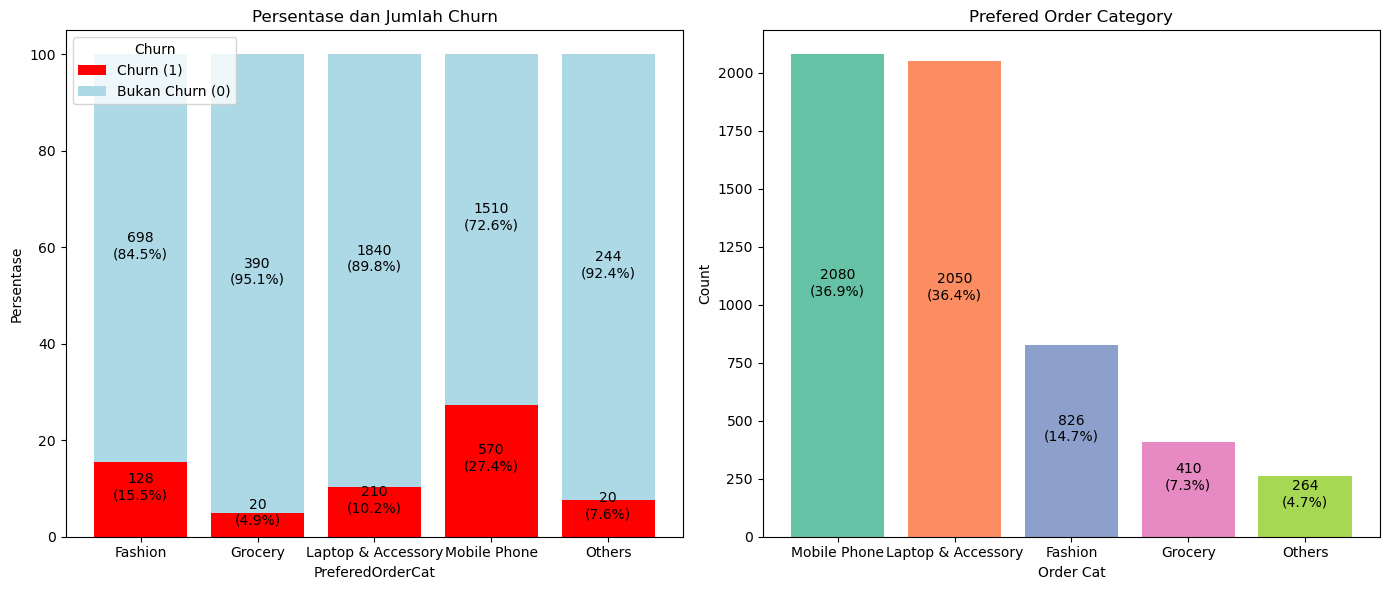

In [ ]:
summary = df['PreferedOrderCat'].value_counts()
percentages = (summary / summary.sum()) * 100

churn_counts = df.groupby(['PreferedOrderCat', 'Churn']).size().unstack(fill_value=0)
churn_percent = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(churn_percent.index, churn_percent[1], label='Churn (1)', color='red')
axes[0].bar(churn_percent.index, churn_percent[0], bottom=churn_percent[1], label='Bukan Churn (0)', color='lightblue')

for i, device in enumerate(churn_percent.index):
    axes[0].text(i, churn_percent[1][i] / 2, f'{churn_counts[1][i]}\n({churn_percent[1][i]:.1f}%)', ha='center', color='black')
    axes[0].text(i, churn_percent[1][i] + churn_percent[0][i] / 2, f'{churn_counts[0][i]}\n({churn_percent[0][i]:.1f}%)', ha='center', color='black')

axes[0].set_title('Persentase dan Jumlah Churn')
axes[0].set_xlabel('PreferedOrderCat')
axes[0].set_ylabel('Persentase')
axes[0].legend(title='Churn', loc='upper left')

axes[1].bar(summary.index, summary, color=sns.color_palette('Set2'))
for idx, (count, percentage) in enumerate(zip(summary, percentages)):
    axes[1].text(idx, count / 2, f'{count}\n({percentage:.1f}%)', ha='center', color='black')

axes[1].set_title('Prefered Order Category')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Order Category')

plt.tight_layout()
plt.show()

Berdasarkan analisis churn terhadap **PreferedOrderCat**, pelanggan dengan kategori **Mobile Phone** memiliki tingkat churn tertinggi sebesar 27.4% (570 dari 2080 pelanggan), diikuti oleh **Fashion** sebesar 15.5% (128 dari 826 pelanggan). Sebaliknya, kategori **Grocery** memiliki tingkat churn terendah sebesar 4.9% (20 dari 410 pelanggan), diikuti oleh kategori **Others** sebesar 7.6% (20 dari 264 pelanggan). Ini menunjukkan bahwa pelanggan kategori **Mobile Phone** lebih rentan untuk churn, yang mungkin disebabkan oleh tingkat kompetisi tinggi dalam produk ini atau ekspektasi pelanggan yang tidak terpenuhi. 

- **Insight:** Tingginya churn pada kategori **Mobile Phone** menyoroti perlunya fokus pada layanan atau penawaran yang lebih menarik di kategori ini, sementara kategori seperti **Grocery** menunjukkan tingkat retensi yang sangat baik. 
- **Rekomendasi:** Tingkatkan kepuasan pelanggan pada kategori **Mobile Phone** melalui peningkatan kualitas layanan, promosi eksklusif, atau program loyalitas. 
- **Aksi:** Bangun strategi seperti diskon tambahan untuk pembelian berulang atau perpanjangan garansi untuk pelanggan **Mobile Phone** serta gunakan kategori seperti **Grocery** sebagai acuan untuk memperkuat strategi retensi secara keseluruhan.

**Churn dengan MaritalStatus**

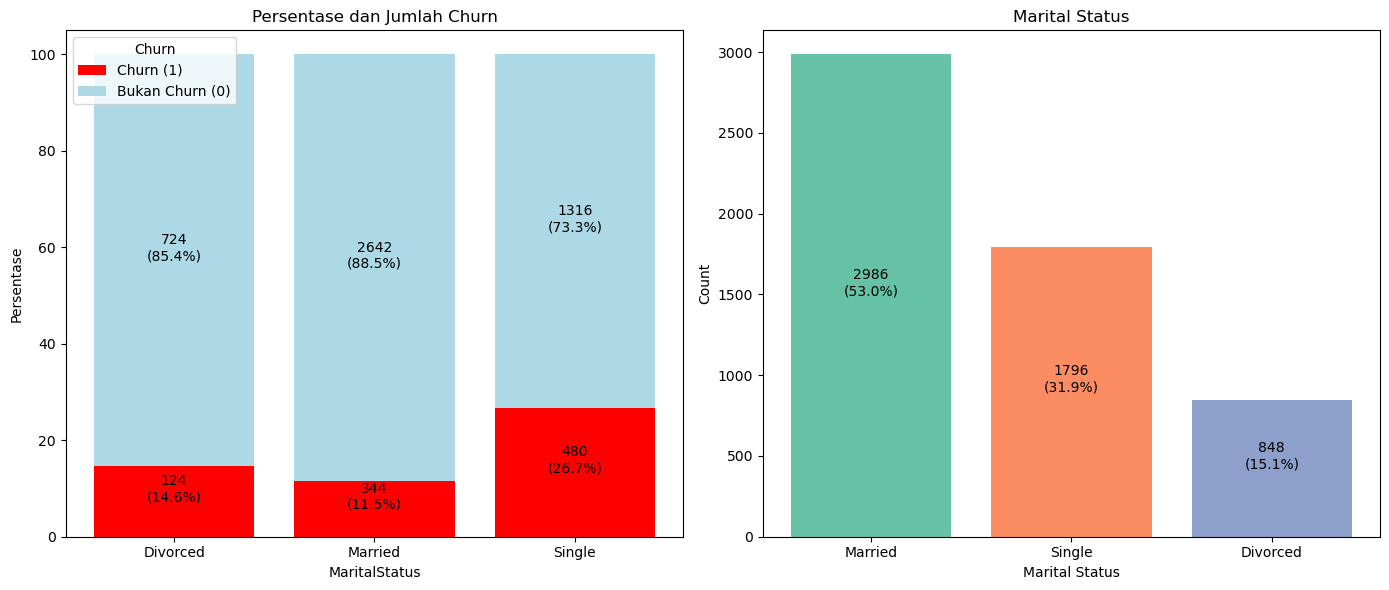

In [ ]:
summary = df['MaritalStatus'].value_counts()
percentages = (summary / summary.sum()) * 100

churn_counts = df.groupby(['MaritalStatus', 'Churn']).size().unstack(fill_value=0)
churn_percent = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(churn_percent.index, churn_percent[1], label='Churn (1)', color='red')
axes[0].bar(churn_percent.index, churn_percent[0], bottom=churn_percent[1], label='Bukan Churn (0)', color='lightblue')

for i, device in enumerate(churn_percent.index):
    axes[0].text(i, churn_percent[1][i] / 2, f'{churn_counts[1][i]}\n({churn_percent[1][i]:.1f}%)', ha='center', color='black')
    axes[0].text(i, churn_percent[1][i] + churn_percent[0][i] / 2, f'{churn_counts[0][i]}\n({churn_percent[0][i]:.1f}%)', ha='center', color='black')

axes[0].set_title('Persentase dan Jumlah Churn')
axes[0].set_xlabel('Marital Status')
axes[0].set_ylabel('Persentase')
axes[0].legend(title='Churn', loc='upper left')

axes[1].bar(summary.index, summary, color=sns.color_palette('Set2'))
for idx, (count, percentage) in enumerate(zip(summary, percentages)):
    axes[1].text(idx, count / 2, f'{count}\n({percentage:.1f}%)', ha='center', color='black')

axes[1].set_title('Marital Status')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Marital Status')

plt.tight_layout()
plt.show()

Dari analisis churn berdasarkan **MaritalStatus**, terlihat bahwa pelanggan dengan status **Single** memiliki tingkat churn tertinggi sebesar 26.7% (480 dari 1796 pelanggan), diikuti oleh pelanggan **Divorced** dengan tingkat churn 14.6% (124 dari 848 pelanggan), sedangkan pelanggan **Married** memiliki tingkat churn terendah sebesar 11.5% (344 dari 2986 pelanggan). Tingkat retensi tertinggi juga terlihat pada pelanggan **Married** dengan 88.5% (2642 pelanggan). Fakta ini menunjukkan bahwa pelanggan yang masih **Single** lebih rentan churn, mungkin karena faktor ekonomi, komitmen terhadap layanan, atau kebutuhan yang berbeda dibandingkan segmen lain. 

- **Insight:** Pelanggan **Single** membutuhkan pendekatan khusus untuk meningkatkan retensi mereka, sementara pelanggan **Married** menunjukkan tingkat loyalitas yang tinggi dan dapat menjadi prioritas untuk dipertahankan. 
- **Rekomendasi:** Kembangkan strategi retensi khusus untuk pelanggan **Single**, seperti program diskon berbasis anggaran, penawaran fleksibel, atau layanan personalisasi yang sesuai dengan kebutuhan mereka. 
- **Aksi:** Lakukan survei terhadap pelanggan **Single** untuk memahami kebutuhan mereka secara lebih mendalam, dan gunakan hasilnya untuk menciptakan program retensi berbasis insentif atau fleksibilitas layanan, guna mengurangi tingkat churn di segmen ini.

**Churn dengan Complain**

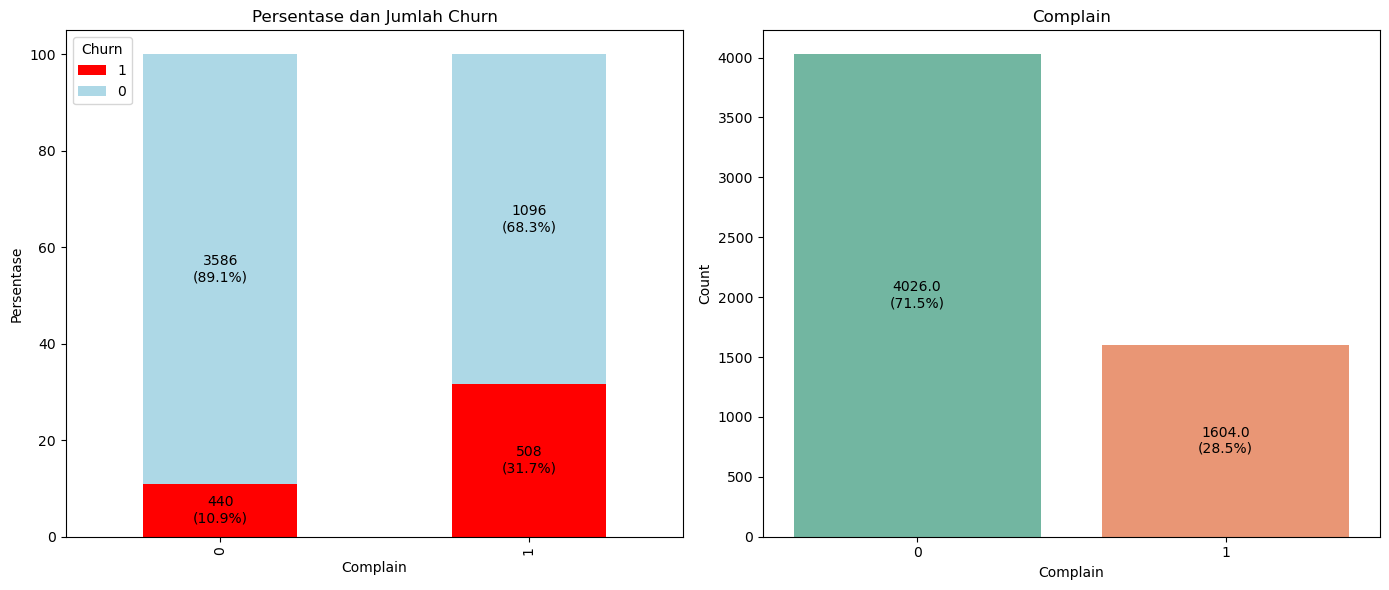

In [52]:
churn_counts = df.groupby(['Complain', 'Churn']).size().unstack(fill_value=0)
churn_percent = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

churn_percent[[1, 0]].plot(kind='bar', stacked=True, ax=axes[0], color=['red', 'lightblue'])
for i, (row, tier) in enumerate(churn_percent.iterrows()):
    axes[0].text(i, tier[1] / 2, f'{churn_counts.loc[tier.name, 1]}\n({tier[1]:.1f}%)',
                 ha='center', va='center', color='black')
    axes[0].text(i, tier[1] + tier[0] / 2, f'{churn_counts.loc[tier.name, 0]}\n({tier[0]:.1f}%)',
                 ha='center', va='center', color='black')

axes[0].set_title('Persentase dan Jumlah Churn')
axes[0].set_xlabel('Complain')
axes[0].set_ylabel('Persentase')
axes[0].legend(title='Churn', loc='upper left')

sns.countplot(x='Complain', data=df, ax=axes[1], palette='Set2')

for p in axes[1].patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    axes[1].text(x, height / 2, f'{height}\n({(height/df.shape[0])*100:.1f}%)',
                 ha='center', va='center', color='black')

axes[1].set_title('Complain')
axes[1].set_xlabel('Complain')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


Dari analisis churn berdasarkan variabel **Complain**, terlihat bahwa pelanggan yang pernah mengajukan keluhan memiliki tingkat churn yang jauh lebih tinggi sebesar 31.7% (508 dari 1604 pelanggan) dibandingkan dengan pelanggan yang tidak pernah mengajukan keluhan, yang memiliki tingkat churn sebesar 10.9% (440 dari 4026 pelanggan). Tingkat retensi pelanggan yang tidak mengajukan keluhan juga jauh lebih tinggi (89.1%) dibandingkan dengan mereka yang mengajukan keluhan (68.3%). Fakta ini mengindikasikan bahwa pengelolaan keluhan memainkan peran krusial dalam retensi pelanggan, dan ketidakpuasan yang tidak terselesaikan kemungkinan besar memicu churn. 

- **Insight:** Pelanggan yang mengeluh menunjukkan risiko churn yang tinggi, yang menyoroti pentingnya sistem penyelesaian keluhan yang cepat dan efektif. 
- **Rekomendasi:** Tingkatkan respons dan penyelesaian keluhan dengan mendirikan sistem layanan pelanggan yang lebih baik, seperti saluran komunikasi 24/7, pelatihan staf, dan mekanisme tindak lanjut keluhan yang proaktif. 
- **Aksi:** Jalankan survei kepuasan pelanggan secara berkala untuk mengidentifikasi potensi keluhan sebelum terjadi, dan luncurkan program kompensasi atau insentif untuk pelanggan yang keluhannya sudah terselesaikan, guna memperbaiki pengalaman mereka dan mengurangi churn.

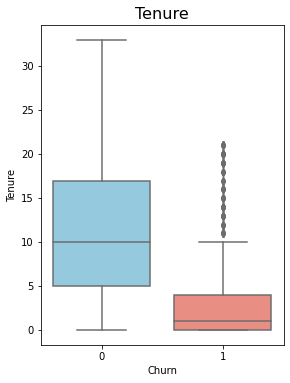

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(341)
sns.boxplot(data=df, y='Tenure', x='Churn', palette=["skyblue", "salmon"])
plt.title('Tenure', fontsize=16)

plt.show()

Dari boxplot di atas, terlihat bahwa pelanggan yang **tidak churn** (Churn = 0) memiliki rentang **Tenure** yang jauh lebih panjang dibandingkan dengan pelanggan yang churn (Churn = 1). Median tenure pelanggan yang tidak churn berada di sekitar 10 bulan, sementara pelanggan yang churn memiliki median tenure yang jauh lebih rendah, di bawah 5 bulan. Selain itu, ada outlier pada pelanggan churn, yang menunjukkan bahwa beberapa pelanggan churn tetap bertahan hingga waktu yang lebih lama. 

- **Insight:** Pelanggan dengan tenure lebih pendek lebih cenderung churn, yang mungkin disebabkan oleh kurangnya keterikatan atau pengalaman awal yang kurang memuaskan. 
- **Rekomendasi:** Fokus pada retensi pelanggan baru selama bulan-bulan awal layanan mereka dengan strategi onboarding yang lebih efektif, seperti diskon untuk pembelian berikutnya, komunikasi proaktif, dan layanan pelanggan yang responsif. 
- **Aksi:** Implementasikan program loyalitas khusus untuk pelanggan dengan tenure rendah, berikan insentif untuk mendorong keterlibatan lebih lanjut, dan monitor secara aktif kepuasan mereka untuk mencegah churn di awal perjalanan pelanggan.

Text(0.5, 1.0, 'DaySinceLastOrder')

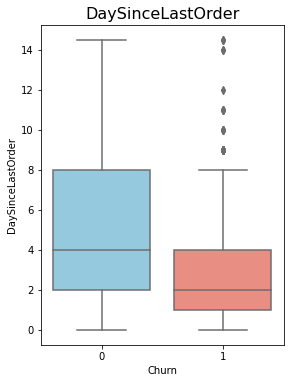

In [42]:
plt.figure(figsize=(20,20))
plt.subplot(342)
sns.boxplot(data=df,y='DaySinceLastOrder', x='Churn', palette=["skyblue", "salmon"])
plt.title('DaySinceLastOrder',fontsize=16)

Dari visualisasi boxplot di atas, terlihat bahwa pelanggan yang **tidak churn** (Churn = 0) memiliki rentang **DaySinceLastOrder** yang lebih luas, dengan median di sekitar 4 hari sejak pesanan terakhir. Sebaliknya, pelanggan yang churn (Churn = 1) memiliki median yang lebih rendah, yaitu sekitar 2 hari sejak pesanan terakhir, dengan rentang yang lebih kecil. Hal ini menunjukkan bahwa pelanggan yang churn cenderung berhenti menggunakan layanan dalam waktu relatif singkat setelah pesanan terakhir mereka, tanpa menunjukkan aktivitas lebih lanjut. 

- **Insight:** Pelanggan yang churn biasanya menunjukkan pola inaktivitas yang singkat setelah melakukan pesanan terakhir, sehingga mendeteksi pola ini lebih awal dapat menjadi indikator churn potensial. 
- **Rekomendasi:** Lakukan pemantauan intensif terhadap pelanggan yang menunjukkan penurunan aktivitas setelah pesanan terakhir mereka, terutama dalam 1-3 hari. 
- **Aksi:** Kirimkan kampanye pengingat, diskon eksklusif, atau rekomendasi produk yang relevan dalam periode kritis setelah pesanan terakhir untuk mendorong pelanggan melakukan pesanan berikutnya dan mengurangi kemungkinan churn.

Text(0.5, 1.0, 'OrderCount')

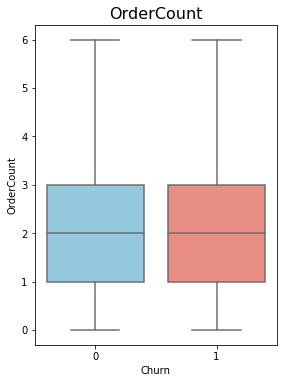

In [43]:
plt.figure(figsize=(20,20))
plt.subplot(343)
sns.boxplot(data=df,y='OrderCount', x='Churn', palette=["skyblue", "salmon"])
plt.title('OrderCount',fontsize=16)

Dari boxplot **OrderCount** di atas, terlihat bahwa distribusi jumlah pesanan (OrderCount) antara pelanggan yang **churn** (Churn = 1) dan yang **tidak churn** (Churn = 0) sangat mirip, dengan median di sekitar 2 pesanan untuk kedua kategori. Rentang jumlah pesanan juga tidak menunjukkan perbedaan signifikan, dengan maksimum di sekitar 6 pesanan. Hal ini mengindikasikan bahwa jumlah pesanan bukanlah faktor utama yang membedakan pelanggan churn dan non-churn. 

- **Insight:** Karena tidak ada perbedaan signifikan dalam OrderCount, variabel ini mungkin memiliki pengaruh yang kecil terhadap churn dibandingkan variabel lain seperti waktu sejak pesanan terakhir atau tingkat interaksi. 
- **Rekomendasi:** Fokus pada variabel yang lebih menentukan seperti frekuensi interaksi pelanggan atau periode inaktivitas setelah pesanan terakhir untuk mengidentifikasi risiko churn. 
- **Aksi:** Lakukan analisis lebih lanjut untuk mengeksplorasi pola pelanggan yang sering bertransaksi tetapi tetap churn, dan tawarkan program loyalitas untuk mempertahankan pelanggan yang sering melakukan pesanan guna memastikan keterlibatan jangka panjang.

Text(0.5, 1.0, 'CashbackAmount')

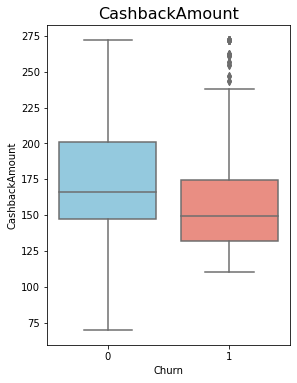

In [44]:
plt.figure(figsize=(20,20))
plt.subplot(344)
sns.boxplot(data=df,y='CashbackAmount', x='Churn', palette=["skyblue", "salmon"])
plt.title('CashbackAmount',fontsize=16)

Dari visualisasi boxplot **CashbackAmount**, terlihat bahwa pelanggan yang **tidak churn** (Churn = 0) cenderung menerima cashback yang lebih tinggi dengan median sekitar 175, dibandingkan pelanggan yang **churn** (Churn = 1) yang memiliki median cashback sekitar 150. Distribusi cashback untuk pelanggan non-churn lebih lebar, dengan nilai maksimum yang lebih tinggi dibandingkan pelanggan churn. Selain itu, terdapat outlier pada pelanggan churn yang menunjukkan bahwa meskipun sebagian kecil pelanggan menerima cashback besar, hal ini tidak cukup untuk mencegah churn. 
- **Insight:** Jumlah cashback yang lebih rendah dapat berkontribusi pada churn, yang mengindikasikan pentingnya insentif finansial untuk mempertahankan pelanggan. 
- **Rekomendasi:** Tingkatkan jumlah cashback atau kembangkan program cashback berbasis loyalitas untuk pelanggan yang menunjukkan risiko churn.  
- **Aksi:** Identifikasi pelanggan dengan cashback rendah yang berisiko churn dan tawarkan cashback tambahan atau insentif eksklusif untuk meningkatkan retensi dan loyalitas mereka terhadap layanan.

Text(0.5, 1.0, 'HourSpendOnApp')

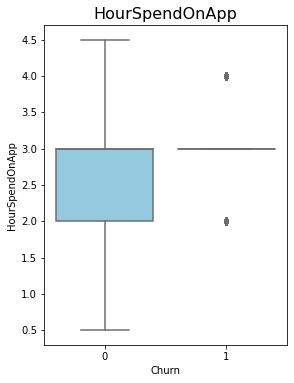

In [45]:
plt.figure(figsize=(20,20))
plt.subplot(345)
sns.boxplot(data=df,y='HourSpendOnApp', x='Churn', palette=["skyblue", "salmon"])
plt.title('HourSpendOnApp' ,fontsize=16)

Dari boxplot **HourSpendOnApp**, terlihat bahwa pelanggan yang **tidak churn** (Churn = 0) memiliki distribusi waktu yang dihabiskan di aplikasi yang lebih bervariasi, dengan median sekitar 2.5 jam. Sebaliknya, pelanggan yang **churn** (Churn = 1) memiliki waktu yang lebih konsisten di sekitar 3 jam tanpa banyak variasi, dengan beberapa outlier yang menghabiskan lebih dari 4 jam dan 2 jam. Hal ini menunjukkan bahwa pelanggan yang churn cenderung menghabiskan lebih sedikit waktu di aplikasi, yang mungkin mencerminkan kurangnya keterlibatan atau minat terhadap layanan.

- **Insight:** Keterlibatan yang rendah dalam aplikasi tampaknya menjadi salah satu indikator churn. Pelanggan yang lebih terlibat, menghabiskan lebih banyak waktu di aplikasi, lebih cenderung untuk tetap bertahan. 
- **Rekomendasi:** Fokus pada meningkatkan keterlibatan pelanggan melalui fitur interaktif, notifikasi yang relevan, atau konten yang dipersonalisasi untuk mendorong penggunaan aplikasi. 
- **Aksi:** Identifikasi pelanggan yang memiliki waktu penggunaan aplikasi rendah dan tawarkan insentif seperti diskon atau rekomendasi produk yang relevan untuk meningkatkan keterlibatan mereka di aplikasi. Hal ini dapat membantu mencegah churn di segmen pelanggan dengan risiko tinggi.

Text(0.5, 1.0, 'SatisfactionScore')

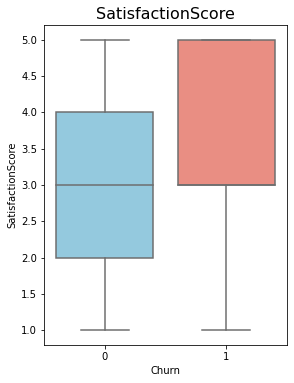

In [46]:
plt.figure(figsize=(20,20))
plt.subplot(346)
sns.boxplot(data=df,y='SatisfactionScore', x='Churn', palette=["skyblue", "salmon"])
plt.title('SatisfactionScore',fontsize=16)

Dari visualisasi boxplot **SatisfactionScore**, terlihat bahwa pelanggan yang **tidak churn** (Churn = 0) memiliki skor kepuasan yang lebih rendah secara umum, dengan median di sekitar 3 dan distribusi yang lebih luas, mencakup nilai-nilai rendah hingga tinggi. Sebaliknya, pelanggan yang **churn** (Churn = 1) cenderung memiliki skor kepuasan yang lebih tinggi, dengan median mendekati 4.5, dan sebagian besar pelanggan churn berada di rentang skor tinggi. Temuan ini agak kontraintuitif karena pelanggan dengan kepuasan lebih tinggi justru lebih cenderung churn. 

- **Insight:** Kepuasan yang tinggi mungkin tidak selalu mengindikasikan loyalitas. Faktor eksternal seperti harga, kompetisi, atau perubahan kebutuhan pelanggan dapat menyebabkan churn meskipun kepuasan tinggi. 
- **Rekomendasi:** Analisis lebih lanjut diperlukan untuk memahami penyebab churn pada pelanggan dengan skor kepuasan tinggi, seperti preferensi fitur atau penawaran yang mungkin tidak sesuai dengan ekspektasi. 
- **Aksi:** Fokus pada penyesuaian produk atau layanan untuk mempertahankan pelanggan yang memiliki skor kepuasan tinggi tetapi berisiko churn, misalnya melalui penawaran eksklusif, program loyalitas, atau survei untuk menangkap kebutuhan mereka lebih mendalam.

Text(0.5, 1.0, 'WarehouseToHome')

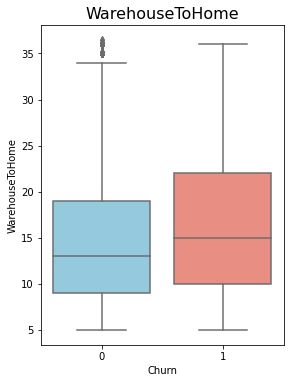

In [47]:
plt.figure(figsize=(20,20))
plt.subplot(347)
sns.boxplot(data=df,y='WarehouseToHome', x='Churn', palette=["skyblue", "salmon"])
plt.title('WarehouseToHome',fontsize=16)

Dari boxplot **WarehouseToHome**, terlihat bahwa pelanggan yang churn (Churn = 1) memiliki distribusi jarak antara gudang dan rumah yang lebih tinggi dibandingkan dengan pelanggan yang tidak churn (Churn = 0). Median jarak untuk pelanggan churn mendekati 15-20 satuan, sementara pelanggan non-churn memiliki median yang lebih rendah, sekitar 10-15 satuan. Selain itu, terdapat beberapa outlier pada pelanggan yang tidak churn, yang menunjukkan jarak yang jauh lebih besar tetapi tidak memengaruhi keputusan mereka untuk tetap bertahan. 

- **Insight:** Jarak antara gudang dan rumah pelanggan tampaknya berpengaruh pada churn, di mana pelanggan dengan jarak lebih jauh memiliki kecenderungan lebih tinggi untuk churn, kemungkinan disebabkan oleh waktu pengiriman yang lebih lama atau pengalaman layanan yang kurang optimal. 
- **Rekomendasi:** Tingkatkan efisiensi pengiriman untuk pelanggan dengan jarak lebih jauh melalui optimalisasi logistik, seperti pemilihan rute yang lebih cepat atau menawarkan pengiriman prioritas. 
- **Aksi:** Identifikasi pelanggan di wilayah dengan jarak lebih jauh dari gudang dan tawarkan insentif seperti pengiriman gratis atau diskon untuk meningkatkan kepuasan mereka, sehingga risiko churn dapat diminimalkan.

Text(0.5, 1.0, 'NumberOfDeviceRegistered')

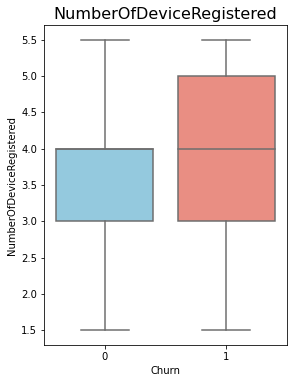

In [48]:
plt.figure(figsize=(20,20))
plt.subplot(348)
sns.boxplot(data=df,y='NumberOfDeviceRegistered', x='Churn', palette=["skyblue", "salmon"])
plt.title('NumberOfDeviceRegistered',fontsize=16)

Dari boxplot **NumberOfDeviceRegistered**, terlihat bahwa pelanggan yang churn (Churn = 1) cenderung memiliki jumlah perangkat terdaftar yang lebih tinggi, dengan median di sekitar 4.5 perangkat, dibandingkan pelanggan yang tidak churn (Churn = 0) yang memiliki median sekitar 3.5 perangkat. Distribusi pelanggan churn juga menunjukkan variasi yang lebih luas hingga 5.5 perangkat, sedangkan pelanggan non-churn memiliki distribusi yang lebih sempit. Hal ini mengindikasikan bahwa semakin banyak perangkat yang terdaftar, semakin tinggi risiko pelanggan untuk churn, mungkin disebabkan oleh tantangan teknis atau kompleksitas dalam mengelola banyak perangkat. 

- **Insight:** Pelanggan dengan banyak perangkat terdaftar lebih rentan churn, mungkin karena mereka memerlukan dukungan lebih dalam sinkronisasi atau penggunaan layanan secara efisien. 
- **Rekomendasi:** Fokuskan upaya untuk meningkatkan pengalaman pengguna lintas perangkat, termasuk layanan dukungan teknis yang responsif, panduan penggunaan yang jelas, dan fitur manajemen perangkat yang efisien. 
- **Aksi:** Luncurkan program komunikasi proaktif untuk pelanggan dengan jumlah perangkat tinggi, tawarkan bantuan teknis personal, atau fitur eksklusif untuk memperkuat loyalitas mereka dan mengurangi risiko churn.

Text(0.5, 1.0, 'NumberOfAddress')

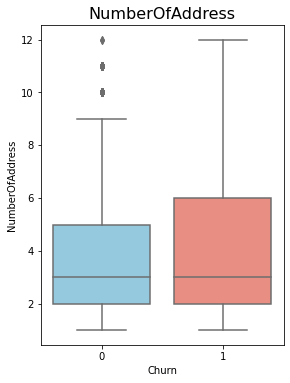

In [49]:
plt.figure(figsize=(20,20))
plt.subplot(349)
sns.boxplot(data=df,y='NumberOfAddress', x='Churn', palette=["skyblue", "salmon"])
plt.title('NumberOfAddress',fontsize=16)

Dari boxplot **NumberOfAddress**, terlihat bahwa pelanggan yang churn (Churn = 1) memiliki distribusi jumlah alamat yang lebih tinggi dibandingkan dengan pelanggan yang tidak churn (Churn = 0). Median jumlah alamat untuk pelanggan dan non-churn hanya sekitar 3. Selain itu, distribusi jumlah alamat pelanggan churn mencakup nilai yang lebih tinggi, hingga 12, dengan sedikit outlier. Hal ini menunjukkan bahwa pelanggan dengan lebih banyak alamat terdaftar cenderung lebih berisiko untuk churn. 

- **Insight:** Pelanggan dengan banyak alamat mungkin mencerminkan perilaku yang lebih kompleks atau kebutuhan logistik yang lebih tinggi, yang jika tidak terpenuhi dengan baik dapat meningkatkan risiko churn. 
- **Rekomendasi:** Tingkatkan pengalaman pelanggan dengan layanan manajemen alamat yang lebih mudah, seperti opsi untuk menyimpan, mengedit, dan memprioritaskan alamat. 
- **Aksi:** Identifikasi pelanggan dengan jumlah alamat tinggi dan berikan layanan personal seperti asisten logistik atau fitur eksklusif untuk mempermudah pengalaman mereka. Langkah ini dapat membantu mengurangi churn di segmen pelanggan dengan kebutuhan logistik kompleks.

Text(0.5, 1.0, 'OrderAmountHikeFromlastYear')

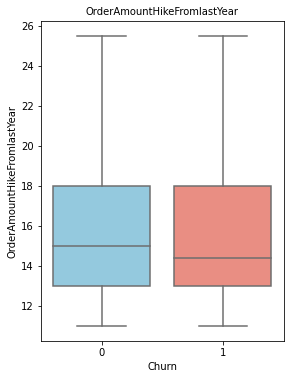

In [50]:
plt.figure(figsize=(20,20))
plt.subplot(3, 4, 10)
sns.boxplot(data=df,y='OrderAmountHikeFromlastYear', x='Churn', palette=["skyblue", "salmon"])
plt.title('OrderAmountHikeFromlastYear',fontsize=10)

Dari boxplot **OrderAmountHikeFromLastYear**, terlihat bahwa distribusi kenaikan jumlah pesanan dari tahun sebelumnya tidak menunjukkan perbedaan yang signifikan antara pelanggan yang churn (Churn = 1) dan yang tidak churn (Churn = 0). Median kenaikan pesanan berada di sekitar angka 14 untuk kedua kelompok, dengan distribusi yang serupa hingga kisaran maksimum 25. Hal ini menunjukkan bahwa variabel ini memiliki dampak yang minimal dalam memprediksi churn. 

- **Insight:** Kenaikan jumlah pesanan dari tahun sebelumnya tidak secara langsung berkorelasi dengan keputusan pelanggan untuk churn, yang mungkin berarti faktor lain seperti pengalaman pelanggan, layanan, atau insentif lebih berpengaruh. 
- **Rekomendasi:** Fokus pada variabel yang lebih kuat memengaruhi churn, seperti retensi melalui pengalaman layanan dan program loyalitas, daripada sekadar memantau perubahan jumlah pesanan tahunan. 
- **Aksi:** Perkuat interaksi dengan pelanggan melalui personalisasi layanan dan penawaran berulang, terlepas dari apakah mereka mengalami kenaikan pesanan atau tidak, untuk memastikan keterlibatan jangka panjang dan mengurangi churn.

Text(0.5, 1.0, 'CouponUsed')

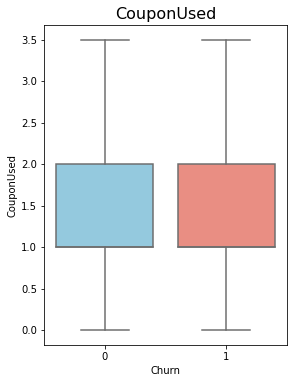

In [51]:
plt.figure(figsize=(20,20))
plt.subplot(3, 4, 11)
sns.boxplot(data=df,y='CouponUsed', x='Churn', palette=["skyblue", "salmon"])
plt.title('CouponUsed',fontsize=16)

Dari boxplot **CouponUsed**, terlihat bahwa distribusi penggunaan kupon antara pelanggan yang churn (Churn = 1) dan yang tidak churn (Churn = 0) hampir identik, dengan median berada di sekitar 2 kupon untuk kedua kelompok. Rentang distribusi juga serupa, mulai dari 0 hingga sekitar 3.5 kupon. Hal ini menunjukkan bahwa penggunaan kupon bukanlah faktor yang membedakan secara signifikan antara pelanggan yang churn dan yang tidak churn. 

- **Insight:** Jumlah kupon yang digunakan tampaknya memiliki dampak yang kecil terhadap keputusan pelanggan untuk churn. Ini mengindikasikan bahwa insentif berupa kupon saja mungkin tidak cukup efektif untuk mengurangi churn. 
- **Rekomendasi:** Kombinasikan program insentif kupon dengan elemen lain yang meningkatkan keterlibatan pelanggan, seperti pengalaman layanan yang lebih personal, dukungan pelanggan yang cepat, atau program loyalitas yang lebih menarik. 
- **Aksi:** Gunakan analitik untuk mengidentifikasi pelanggan yang menggunakan sedikit kupon namun menunjukkan tanda-tanda churn, lalu tawarkan insentif tambahan berupa diskon eksklusif atau penawaran personal untuk meningkatkan keterlibatan dan loyalitas mereka.

### **Feature Engineering & Model Development**

In [52]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,NoLastOrderInfo
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2,Single,9.0,1,11.0,1.0,1.0,5.0,159.93,0
1,1,5.2,Mobile Phone,1,8.0,UPI,Male,3.0,4.0,Mobile Phone,3,Single,7.0,1,15.0,0.0,1.0,0.0,120.90,0
2,1,4.8,Mobile Phone,1,30.0,Debit Card,Male,2.0,4.0,Mobile Phone,3,Single,6.0,1,14.0,0.0,1.0,3.0,120.28,0
3,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,5,Single,8.0,0,23.0,0.0,1.0,3.0,134.07,0
4,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3.0,Mobile Phone,5,Single,3.0,0,11.0,1.0,1.0,3.0,129.60,0


In [53]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

transformer=ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['PreferredLoginDevice','Gender','MaritalStatus']),
    ('binary', ce.BinaryEncoder(), ['PreferredPaymentMode', 'PreferedOrderCat'])
], remainder='passthrough')

In [54]:
x=df.drop(columns=['Churn'])
y=df['Churn']

In [55]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=2021)

In [56]:
testing=pd.DataFrame(transformer.fit_transform(x_train),columns=transformer.get_feature_names_out())
testing.head()

,onehot__PreferredLoginDevice_Mobile Phone,onehot__Gender_Male,onehot__MaritalStatus_Married,onehot__MaritalStatus_Single,binary__PreferredPaymentMode_0,binary__PreferredPaymentMode_1,binary__PreferredPaymentMode_2,binary__PreferedOrderCat_0,binary__PreferedOrderCat_1,binary__PreferedOrderCat_2,...,remainder__NumberOfDeviceRegistered,remainder__SatisfactionScore,remainder__NumberOfAddress,remainder__Complain,remainder__OrderAmountHikeFromlastYear,remainder__CouponUsed,remainder__OrderCount,remainder__DaySinceLastOrder,remainder__CashbackAmount,remainder__NoLastOrderInfo
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,5.0,4.0,8.0,0.0,16.0,2.0,2.0,1.0,170.05000,0.0
1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,3.0,3.0,1.0,0.0,17.6,0.0,3.0,9.0,272.32625,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,3.0,5.0,2.0,1.0,13.0,2.0,2.0,3.0,130.65000,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,3.0,4.0,2.0,1.0,19.0,3.5,6.0,8.0,120.22000,0.0
4,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,4.0,1.0,1.0,0.0,13.0,0.0,1.0,2.0,127.20000,0.0


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

logreg=LogisticRegression(max_iter=1000, random_state=42)
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
xgb=XGBClassifier()
lgbm=lgb.LGBMClassifier()

In [58]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.pipeline import Pipeline

models=[logreg,knn,dt,rf,xgb,lgbm]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
              'mean roc_auc':rata,'sdev':std}).set_index('model').sort_values(by='mean roc_auc',ascending=False)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[LightGBM] [Info] Number of positive: 607, number of negative: 2996
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 454
[LightGBM] [Info] Number of data points in the train set: 3603, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168471 -> initscore=-1.596505
[LightGBM] [Info] Start training from score -1.596505
[LightGBM] [Info] Number of positive: 606, number of negative: 2997
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 453
[LightGBM] [Info] Number of data points in the train set: 3603, number of used features: 24
[LightGBM] [Info] [binary:Bo

,mean roc_auc,sdev
model,,
Random Forest,0.989115,0.002254
XGBoost,0.985972,0.003264
LightGBM,0.984244,0.002646
Decision Tree,0.903264,0.017620
Logistic Regression,0.894109,0.008027
KNN,0.866353,0.015502


In [59]:
def calc_train_error(X_train, y_train, model):
    predictions=model.predict(X_train)
    predictProba=model.predict_proba(X_train)
    accuracy=accuracy_score(y_train, predictions)
    f1=f1_score(y_train, predictions, average='macro')
    roc_auc=roc_auc_score(y_train, predictProba[:,1])
    recall=recall_score(y_train, predictions)
    precision=precision_score(y_train, predictions)
    report=classification_report(y_train, predictions)
    return { 
        'report': report, 
        'f1': f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_validation_error(X_test, y_test, model):
    predictions=model.predict(X_test)
    predictProba=model.predict_proba(X_test)
    accuracy=accuracy_score(y_test, predictions)
    f1=f1_score(y_test, predictions, average='macro')
    roc_auc=roc_auc_score(y_test, predictProba[:,1])
    recall=recall_score(y_test, predictions)
    precision=precision_score(y_test, predictions)
    report=classification_report(y_test, predictions)
    return { 
        'report': report, 
        'f1': f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error=calc_train_error(X_train, y_train, model)
    validation_error=calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [60]:
K=10
kf=StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

In [61]:
data=x_train
target=y_train

In [62]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

train_errors_without_oversampling=[]
validation_errors_without_oversampling=[]

train_errors_with_oversampling=[]
validation_errors_with_oversampling=[]

for train_index, val_index in kf.split(data, target):
    X_train,X_val=data.iloc[train_index], data.iloc[val_index]
    Y_train,Y_val=target.iloc[train_index], target.iloc[val_index]
    
    ros=RandomOverSampler()

    X_ros,Y_ros=ros.fit_resample(X_train, Y_train)

    lgbm=lgb.LGBMClassifier()
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',lgbm)
    ])

    train_error_without_oversampling,val_error_without_oversampling=calc_metrics(X_train,Y_train,X_val,Y_val,estimator)
    train_error_with_oversampling,val_error_with_oversampling=calc_metrics(X_ros,Y_ros,X_val,Y_val,estimator)
    
    train_errors_without_oversampling.append(train_error_without_oversampling)
    validation_errors_without_oversampling.append(val_error_without_oversampling)

    train_errors_with_oversampling.append(train_error_with_oversampling)
    validation_errors_with_oversampling.append(val_error_with_oversampling)

[LightGBM] [Info] Number of positive: 682, number of negative: 3371
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001462 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 455
[LightGBM] [Info] Number of data points in the train set: 4053, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168270 -> initscore=-1.597935
[LightGBM] [Info] Start training from score -1.597935
[LightGBM] [Info] Number of positive: 3371, number of negative: 3371
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 459
[LightGBM] [Info] Number of data points in the train set: 6742, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [

In [63]:
listItem=[]

for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling):
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate=pd.DataFrame(listItem, 
                        columns=['Train Accuracy', 
                                 'Test Accuracy',
                                 'Train ROC AUC', 
                                 'Test ROC AUC', 
                                 'Train F1 Score',
                                 'Test F1 Score',
                                 'Train Recall',
                                 'Test Recall',
                                 'Train Precision',
                                 'Test Precision'])

listIndex=list(dfEvaluate.index)
listIndex[-1]='Average'
dfEvaluate.index=listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.998273,0.964523,0.999992,0.982842,0.996902,0.933136,0.989736,0.828947,1.000000,0.954545
1,0.999013,0.968958,0.999998,0.988246,0.998235,0.944025,0.995601,0.894737,0.998529,0.918919
2,0.999013,0.964523,0.999999,0.986561,0.998233,0.932358,0.994135,0.815789,1.000000,0.968750
3,0.999260,0.975610,0.999997,0.980982,0.998675,0.954803,0.995601,0.881579,1.000000,0.971014
4,0.999260,0.971111,0.999998,0.981547,0.998677,0.945959,0.995608,0.866667,1.000000,0.955882
5,0.998520,0.957778,0.999993,0.981760,0.997353,0.918206,0.992679,0.786667,0.998527,0.951613
6,0.998520,0.968889,0.999973,0.981389,0.997356,0.943394,0.995601,0.881579,0.995601,0.930556
7,0.998027,0.960000,0.999983,0.977589,0.996466,0.926420,0.991202,0.842105,0.997050,0.914286
8,0.998520,0.977778,0.999992,0.991838,0.997350,0.959567,0.992669,0.907895,0.998525,0.958333
9,0.998767,0.955556,0.999997,0.982269,0.997790,0.917328,0.992669,0.815789,1.000000,0.911765


In [64]:
listItem=[]

for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling):
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate=pd.DataFrame(listItem, 
                        columns=['Train Accuracy', 
                                 'Test Accuracy', 
                                 'Train ROC AUC', 
                                 'Test ROC AUC', 
                                 'Train F1 Score',
                                 'Test F1 Score',
                                 'Train Recall',
                                 'Test Recall',
                                 'Train Precision',
                                 'Test Precision'])

listIndex=list(dfEvaluate.index)
listIndex[-1]='Average'
dfEvaluate.index=listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.997775,0.962306,0.999984,0.987895,0.997775,0.934450,1.000000,0.921053,0.995570,0.864198
1,0.998072,0.977827,0.999978,0.990456,0.998072,0.962011,0.999703,0.986842,0.996452,0.892857
2,0.997775,0.968958,0.999987,0.985509,0.997775,0.943419,0.999110,0.881579,0.996450,0.930556
3,0.997182,0.973392,0.999978,0.973544,0.997182,0.951502,0.999407,0.894737,0.994979,0.944444
4,0.998072,0.982222,0.999967,0.981938,0.998072,0.968000,1.000000,0.946667,0.996158,0.946667
5,0.996737,0.957778,0.999968,0.983004,0.996737,0.923592,0.999110,0.866667,0.994390,0.878378
6,0.997034,0.960000,0.999939,0.973684,0.997034,0.930909,0.999110,0.921053,0.994979,0.853659
7,0.998665,0.948889,0.999973,0.974669,0.998665,0.913844,1.000000,0.921053,0.997338,0.804598
8,0.997479,0.977778,0.999984,0.991099,0.997479,0.960830,0.999703,0.947368,0.995276,0.923077
9,0.997034,0.964444,0.999971,0.981002,0.997034,0.936000,1.000000,0.881579,0.994104,0.905405


In [65]:
for rep in validation_errors_without_oversampling:
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       375
           1       0.95      0.83      0.89        76

    accuracy                           0.96       451
   macro avg       0.96      0.91      0.93       451
weighted avg       0.96      0.96      0.96       451

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       375
           1       0.92      0.89      0.91        76

    accuracy                           0.97       451
   macro avg       0.95      0.94      0.94       451
weighted avg       0.97      0.97      0.97       451

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       375
           1       0.97      0.82      0.89        76

    accuracy                           0.96       451
   macro avg       0.97      0.91      0.93       451
weighted avg       0.96      0.96      0.96       451

              preci

In [66]:
for rep in validation_errors_with_oversampling:
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       375
           1       0.86      0.92      0.89        76

    accuracy                           0.96       451
   macro avg       0.92      0.95      0.93       451
weighted avg       0.96      0.96      0.96       451

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       375
           1       0.89      0.99      0.94        76

    accuracy                           0.98       451
   macro avg       0.95      0.98      0.96       451
weighted avg       0.98      0.98      0.98       451

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       375
           1       0.93      0.88      0.91        76

    accuracy                           0.97       451
   macro avg       0.95      0.93      0.94       451
weighted avg       0.97      0.97      0.97       451

              preci

In [67]:
rf=RandomForestClassifier()
ros=RandomOverSampler(random_state=42)

estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',rf)
])

In [68]:
param_grid = {
    'model__n_estimators': [50, 100, 200],  # Jumlah pohon
    'model__max_depth': [None, 10, 20, 30],  # Kedalaman maksimum pohon
    'model__min_samples_split': [2, 5, 10],  # Minimum sampel untuk split
    'model__min_samples_leaf': [1, 2, 4],  # Minimum sampel di daun
    'model__max_features': ['sqrt', 'log2', None],  # Jumlah maksimum fitur
    'model__random_state': [42]
}

In [69]:
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(estimator, param_grid=param_grid, scoring='roc_auc',
                  cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42))

In [ ]:
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

print("Best score:", grid.best_score_)
print("Best parameters:", grid.best_params_)

In [ ]:
best_model=grid.best_estimator_
best_model.fit(x_train, y_train)

In [ ]:
estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',rf)
])
estimator.fit(x_train, y_train)

In [ ]:
y_pred_default=estimator.predict(x_test)
y_pred_proba_default=estimator.predict_proba(x_test)
y_pred_tuned=best_model.predict(x_test)
y_pred_proba_tuned=best_model.predict_proba(x_test)

roc_auc_default=roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned=roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default Random Forest:', roc_auc_default)
print('ROC AUC Score Tuned Random Forest:', roc_auc_tuned)

In [ ]:
coef1 = pd.Series(best_model['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = True).tail()
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

In [ ]:
print('Classification Report Tuned Random Forest:\n',report_tuned)